<a href="https://colab.research.google.com/github/VilasSonawane/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Vilas_Copy_of_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
---
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The data set used for the study pertains to the restaurants in the Gachibowli area of Hyderabad city in Telangana, India. It includes two csv files - one describing the information about each restaurant and the second csv file has user reviews information for these restaurants.

**The project focuses on three broad objectives:**

* Analyze the sentiments of the reviews given by the customers and make some useful conclusions.

* **For the Company:** Cluster the zomato restaurants into different segments. Use the clustering to solve some business cases for the company to grow up and work on the fields they are currently lagging in.

* **For the customer:** Provide a methodology to find the best restaurants in Gachibowli. We will use cuisine and costing info in cost vs. benefit analysis.
Also the metadata of reviewers has been used for identifying the critics in the industry and analyse their reviews.

There are two datasets available for us.
1. Zomato Restaurant names and metadata
2. Zomato Restaurant reviews

## **Data Description:**
---
#### **Zomato Restaurant names and Metadata**
1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

In addition to the above given variables, we have performed webscraping to extract additional information from the urls provided in the restaurants dataset. A detailed description of those variables follows.


#### **Zomato Restaurant reviews**

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

The detailed Data dictionary can be found here.

Before we begin the analysis, let us install some useful libraries and import some other libraries. We have stored the data sets in the google drive folder and we will mount the drive onto the colab notebook.

In [1]:
# Installation of new libraries
!pip install textblob

# Installing a new library called squarify to draw tree maps
# Un-comment the below sentence if squarify is not installed
!pip install squarify

! pip install folium

In [2]:
# Importing the libraries
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ast
import scipy
import math
import random
import matplotlib
import sklearn
import matplotlib.colors as mcolors
from datetime import datetime
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import squarify
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import folium
from branca.element import Figure

# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords
# for Stemming purpose
from nltk.stem.porter import PorterStemmer 
# for Calculate Sentiment Polarity
from textblob import TextBlob
# For parts of speech tagging
from nltk.tag import pos_tag
from nltk.tag import pos_tag_sents
# For Lemmatization
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
# Mounting the Google Drive folders to google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data into a csv
names_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/Zomato Restaurant names and Metadata.csv')

review_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/Zomato Restaurant reviews.csv')

# ***Glossary:***
---

1. Data cleaning of restaurants data
2. Data cleaning of reviews data
3. Univariate analysis
  * Univariate analysis of Restaurants data
  * Univariate analysis of reviews data
4. Sentiment Analysis of user reviews

# **1) Data Cleaning of Restaurants Data**
---

## **Web scraping from urls**
* We will use the hyperlinks provided in the **Zomato restaurant names and metadata.csv** file to scrape some extra variables from the websites that may be useful for our ananlysis.
* We will extract the following variables for each restaurant:
  1. **Latitude:** Latitude of the restaurant location
  2. **Longitude:** Longitude of the restaurant location
  3. **Additional services:** List of additional services offered by the restaurant
  4. **Has Featured:** A binary variable to indicate if the restaurant has featured in the list of most popular places in Hyderabad

The web scraping activity was performed by using services for webscraping provided by 'Scraping Bee'. Further regular expressions in python have been used to parse the required information from the html string of the url.

**Note:** The following cells for webscraping are only for demonstration purposes. So they have been commented out to prevent the cell from being executed again. The extracted variables from earlier execution have been stored in a csv file. In this file, we will directly read data from that csv file only.

**Sample of a url on Google Chrome:**
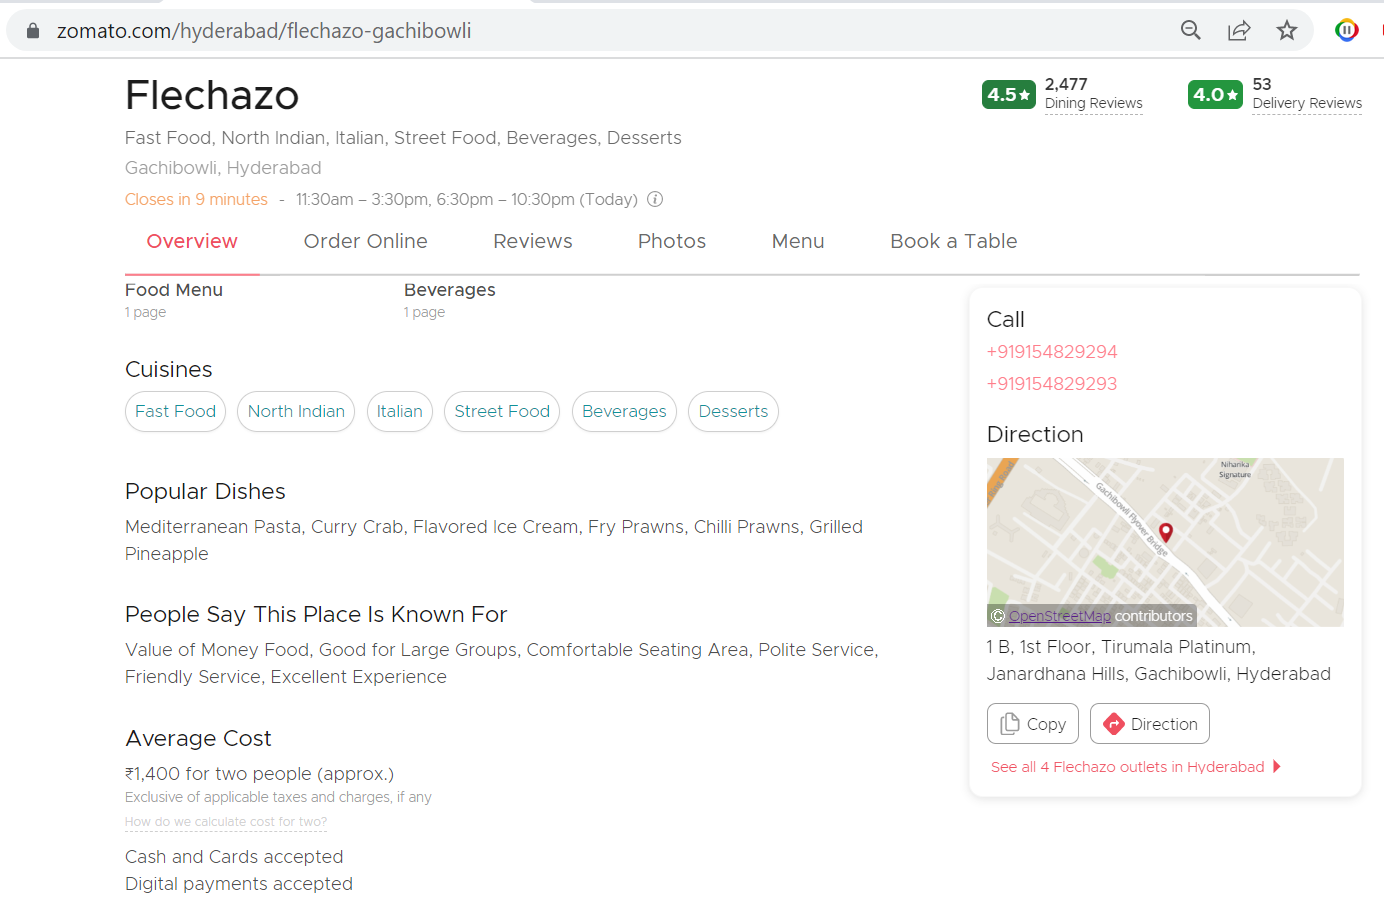




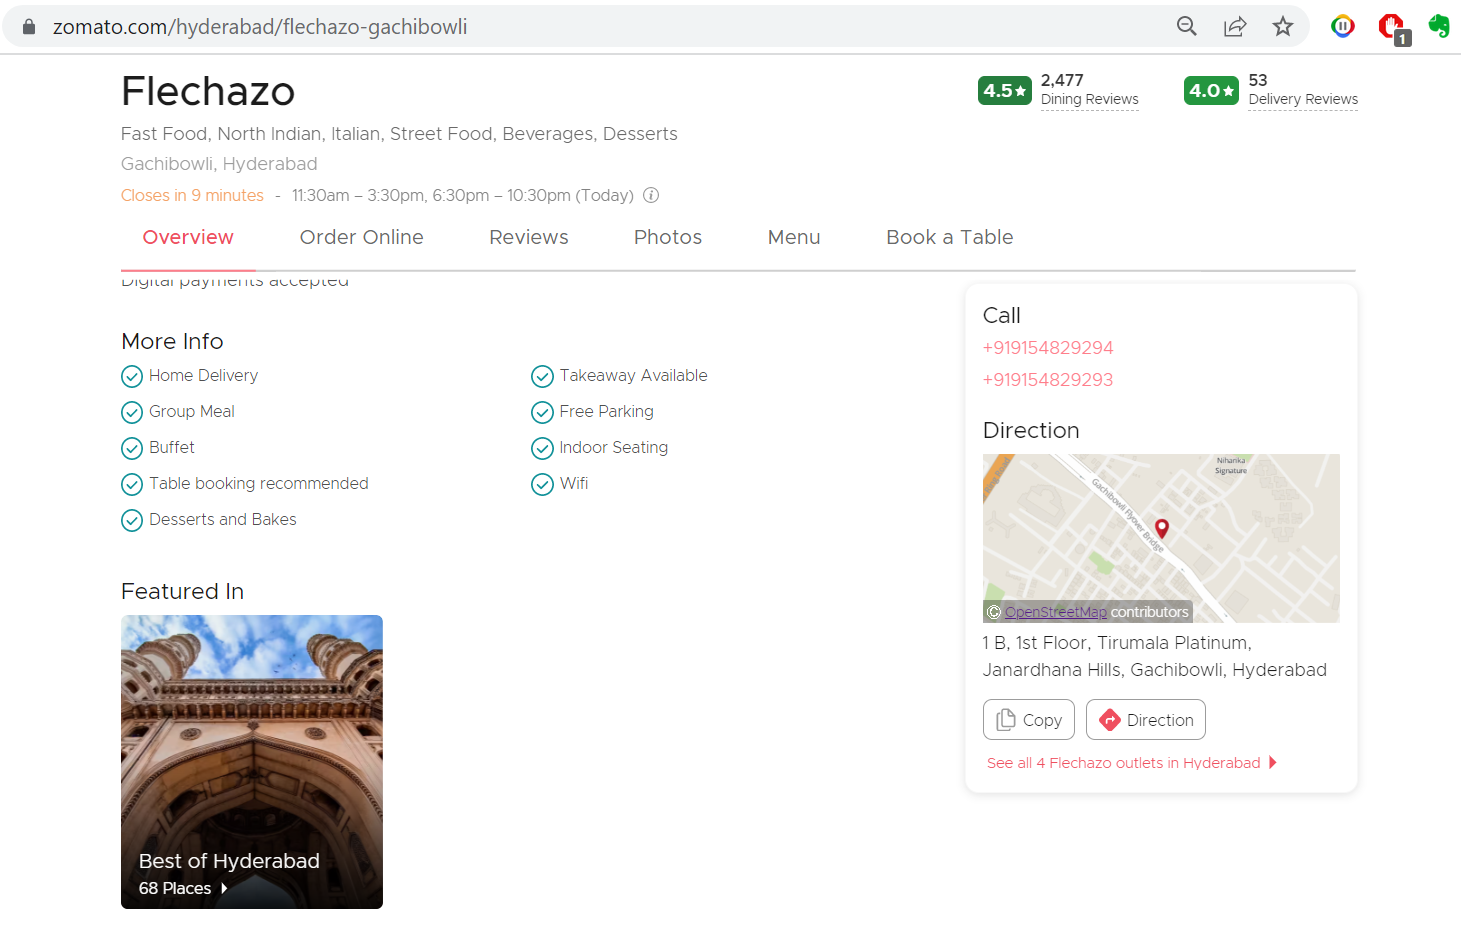






Let us begin the operation 'SCRAPING'!

In [5]:
# Defining a function to scrape the content in the website and return the html script of the page(Scraping already done, so no need to run again.)
'''
def send_request(url):
    response = requests.get(
        url='https://app.scrapingbee.com/api/v1/',
        params={
            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',
            'url': url,  
        },
        
    )
    #print('Response HTTP Status Code: ', response.status_code)
    #print('Response HTTP Response Body: ', response.content)
    return response
'''

"\ndef send_request(url):\n    response = requests.get(\n        url='https://app.scrapingbee.com/api/v1/',\n        params={\n            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',\n            'url': url,  \n        },\n        \n    )\n    #print('Response HTTP Status Code: ', response.status_code)\n    #print('Response HTTP Response Body: ', response.content)\n    return response\n"

In [6]:
# Creating a new column to store the html string of each url
'''
names_df['content'] = np.nan
'''

"\nnames_df['content'] = np.nan\n"

In [7]:
# Scraping through each url and storing the html string in the content column of the data frame
'''
for i,url in enumerate(names_df['Links']):
  response = send_request(url)
  content = response.content
  names_df.loc[i,'content'] = str(content)
'''

"\nfor i,url in enumerate(names_df['Links']):\n  response = send_request(url)\n  content = response.content\n  names_df.loc[i,'content'] = str(content)\n"

In [8]:
# Writing the dataframe to a csv to ensure no data loss in working
'''
names_df.to_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/names_df_v2')
'''

"\nnames_df.to_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/names_df_v2')\n"

In [9]:
# reading the dataframe from the csv file containing the extracted variables
names_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/names_df_v2.csv')

In [10]:
# checking for null entries
sum(names_df['content'].isnull())

0

No null entries. so the html strings were successfully extracted from all the urls.

In [11]:
# Parsing for the required variables from the extracted html string using regular expression
for i, content in enumerate(names_df['content']):
  # updating the string to a soup string to make parsing easier
  soup = str(BeautifulSoup(names_df.loc[i,'content'],"html.parser"))

  # Parsing the latitude and longitude
  tmp = list(re.finditer('https://maps.zomato.com/',soup))
  if len(tmp) == 0:
    names_df.loc[i,'latitude'] = np.nan
    names_df.loc[i,'longitude'] = np.nan
  else:
    loc = tmp[0].span()[0]
    geo_loc = re.findall('=.+&map',soup[loc:loc+200])[0][1:-4]
    names_df.loc[i,'latitude'] = geo_loc.split(',')[0]
    names_df.loc[i,'longitude'] = geo_loc.split(',')[1]

  # Parsing the List of additional services( as a dictionary item in the dataframe column)
  tmp_loc = re.search("More Info",str(soup))
  if tmp_loc==None:
    names_df.loc[i,'additional_services'] = np.nan
  else:
    more_loc = tmp_loc.span()[0]
    tmp = soup[more_loc:]
    inds = list(re.finditer('color="#4F4F4F"',tmp))
    services = list()
    for ind in inds:
      loc = ind.span()[0]
      services.append(re.findall('>.+</p',tmp[loc:loc+50])[0][1:-3])
    names_df.loc[i,'additional_services'] = str(services)
    
  # Identifying if the restaurant has featured in any of the best lists of the city - binary variable ---> 1 if featured, 0 otherwise
  names_df.loc[i,'Has_Featured'] = int(len(list(re.finditer('Featured In',soup)))>0)

In [12]:
# dropping the redundant columns
names_df.drop(['content','Unnamed: 0','Unnamed: 0.1','Links'],axis = 1,inplace = True)

In [13]:
names_df.head(2)

,Name,Cost,Collections,Cuisines,Timings,latitude,longitude,additional_services,Has_Featured
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",17.4288789799,78.3739606768,"['Home Delivery', 'Takeaway Available', 'Seati...",0.0
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,17.4423818301,78.3565796167,"['Home Delivery', 'Takeaway Available', 'Valet...",1.0


## **Merging of additional services:**
There are 51 unique additional services in the data obtained from the urls. Here, we will merge some of the similar categories into fewer categories. The merged categories can be found here in this [link](https://docs.google.com/spreadsheets/d/1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI/edit?usp=sharing)

In [14]:
# Replacing nan values with an empty list
names_df['additional_services'] = names_df['additional_services'].replace(np.nan,'[]')

In [15]:
# Creating a master list to find out how many and what catergories of additional services are available in total
master_list_add_servs = list()
for i, add_list in enumerate(names_df['additional_services']):
  master_list_add_servs.extend(ast.literal_eval(names_df.loc[i,'additional_services']))
master_list_add_servs = list(set(master_list_add_servs))

In [16]:
len(master_list_add_servs)

51

In [17]:
# So there are 51 unique additional services in total

In [18]:
# Sample of the services
master_list_add_servs[:11]

['Rooftop',
 'High Chair Available',
 'Private Dining Area Available',
 'Seating Available',
 'Table booking recommended',
 'Kid Friendly',
 'Valet Parking Available',
 'Live Entertainment',
 'Table reservation required',
 'Outdoor Seating',
 'Free Parking']

In [19]:
# Reading the google sheet containing the merged categories
sheet_id = "1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI"
sheet_name = "Additional services"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
url = url.replace(" ", "%20")
new_services = pd.read_csv(url)
new_services = new_services[['Merged Category','Merged services']]

In [20]:
# Checking if all the services are listed with the same names in the gsheet
m = list()
for serv_list in new_services['Merged services'].str.split('\n'):
  m.extend(serv_list)

for item in m:
  if item in master_list_add_servs:
    pass
  else:
    print(item)

All the services are listed with proper names. So we can go ahead and create our dataframe

## **One hot encoding of additional services:**
Let us create additional columns for each of the additional services(merged ones) through one hot encoding and add them to the names_df dataframe for further use.

In [21]:
# Creating the new columns with one hot encoding
hot_dict = dict()
for i,cat in enumerate(new_services['Merged Category']):
  serv_list = new_services['Merged services'].str.split('\n')[i]
  tmp = list()
  for j,row in enumerate(names_df['additional_services']):
    row = ast.literal_eval(row)
    tmp.append(int(len(set(row).intersection(set(serv_list)))>0))
  hot_dict.update({cat:tmp})

In [22]:
hot_encoded_servs_df = pd.DataFrame(hot_dict)
hot_encoded_servs_df.sum()

Vegetarian only       4
Outdoor seating      10
Entertainment        20
Work Friendly         3
Wifi                 23
Breakfast            21
Delivery only         4
Parking available    31
Seating available    74
Alcohol avialable    27
Family Friendly       8
Home Delivery        72
No Alcohol            2
Brunch                7
Restricted entry      2
Luxury dining         1
Romantic Dining      11
dtype: int64

* Many of the services are offered by very less number of restaurants. Let us drop all those services which are offered by less than 5 restaurants

In [23]:
to_drop = hot_encoded_servs_df.sum().reset_index().rename(columns = {'index':'service_category',0:'no_of_rests'})
hot_encoded_servs_df.drop(list(to_drop[to_drop['no_of_rests']<=5].service_category),axis = 1,inplace = True)

In [24]:
hot_encoded_servs_df.shape

(105, 11)

In [25]:
names_df.shape

(105, 9)

In [26]:
# Appending the new columns to the names_df dataframe
names_df = pd.concat([names_df,hot_encoded_servs_df],axis = 1)
names_df.drop('additional_services',axis = 1,inplace = True)

In [27]:
names_df.columns

Index(['Name', 'Cost', 'Collections', 'Cuisines', 'Timings', 'latitude',
       'longitude', 'Has_Featured', 'Outdoor seating', 'Entertainment', 'Wifi',
       'Breakfast', 'Parking available', 'Seating available',
       'Alcohol avialable', 'Family Friendly', 'Home Delivery', 'Brunch',
       'Romantic Dining'],
      dtype='object')

In [28]:
# Let us add a new column to denote the number of services offered by a restaurant
names_df['no of services'] = names_df[list(hot_encoded_servs_df.columns)].sum(axis=1)

In summary, the following are the major services offered by the restaurants:
1. Outdoor seating
2. Entertainment
3. Wifi
4. Breakfast
5. Parking available
6. Seating available
7. Alcohol avialable
8. Family Friendly
9. Home Delivery
10. Brunch
11. Romantic Dining

## **Analysing the Timings column**

The observations inside the timings column are given in very inconsistent format. Let us explore the column to extract key information.

In [29]:
# Let us look at the sample of 5 rows
list(names_df['Timings'].values[:5])

['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)',
 '11 AM to 11 PM',
 '11:30 AM to 4:30 PM, 6:30 PM to 11 PM',
 '12 Noon to 2 AM',
 '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)']

In [30]:
# Replacing the missing values with empty strings
names_df['Timings']=names_df['Timings'].replace(np.nan,'')

# Converting the strings in the column to lowercase
names_df['Timings'] = names_df['Timings'].str.lower()

In [31]:
def multiple_str_replaces(org_str,maps):
  '''
  This function takes a dictionary of mapping with keys as the charecters to be replaced in a string and
  the values as the characters to be replaced with
  '''
  for l,r in maps.items():
    org_str = org_str.replace(l,r)
  return org_str

In [32]:
# Defining the list of things we want to format by replacements.
mappings = {'noon':'pm','midnight':'am','),':');'}

# Applying the above changes to all the entries in the column
names_df['Timings'] = names_df['Timings'].apply(lambda x: multiple_str_replaces(x,maps = mappings))

In [33]:
def drop_closed_days(in_str):
  '''
  This function deletes the days when the restaurant is closed Ex: the text tue closed, thu closed will be deleted
  '''
  regex = re.compile('[a-z]{3} closed|closed \([a-z]{3}\)')
  result = re.findall(regex,in_str)
  for text in result:
    in_str = in_str.replace('; '+text,'')
  return in_str

In [34]:
# Applying the above function
names_df['Timings'] = names_df['Timings'].apply(lambda x: drop_closed_days(x))

In [35]:
def expand_days(in_str):
  '''
  This function takes a from-to of week days string and replaces it with all the days in between.
  For Ex: 'tue-sat' will be replaced by 'tue,wed,thu,fri,sat'
  '''
  days = ['mon','tue','wed','thu','fri','sat','sun']
  in_days = in_str.split('-')
  
  result = ''

  for i,day in enumerate((days*2)[(days*2).index(in_days[0]):]):
    if day == in_days[1]:
      result = result+', '+day
      break
    elif i==0:
      result = result+day
    else:
      result = result+', '+day
  return result

In [36]:
def open_days(in_str):
  '''
  This function returns the list of days on which a restaurant is open given a string of 'timings' column as argument
  '''
  regex = re.compile(".*?\((.*?)\)")
  result = re.findall(regex, in_str)
  for i,text in enumerate(result):
    if '-' in text:
      result[i] = expand_days(result[i])
    else:
      pass
  result = ', '.join(result)
  if result == '':
    result = ''
  else:
    result = str(list(set(result.split(', '))))
  return result

In [37]:
# Manually updating an occurence which is in a different format
names_df.at[95,'Timings'] = '1 pm to 2 am (mon), (wed-sun)'

# Applying the above function all the occurences in the timings column
names_df['Open_days'] = names_df['Timings'].apply(lambda x: open_days(x))

# Assuming that the restaurants whose open days are not listed are open on all days
names_df['Open_days']=names_df['Open_days'].replace('',str(['mon','tue','wed','thu','fri','sat','sun']))

In [38]:
names_df['Open_days'].values[:10]

array(["['fri', 'thu', 'sun', 'sat', 'wed', 'tue', 'mon']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['fri', 'sun', 'thu', 'sat', 'wed', 'tue', 'mon']",
       "['fri', 'sun', 'thu', 'sat', 'wed', 'tue', 'mon']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['fri', 'thu', 'sun', 'sat', 'wed', 'tue', 'mon']"], dtype=object)

Let us see how many restaurants are not open on all days.

In [39]:
x=names_df['Open_days'][0]
sum(names_df['Open_days'].apply(lambda x: int(len(ast.literal_eval(x))<7)))

5

Only 5 restaurants do not open on all days of the week. so then Lets drop open_days column so as such it will not contribute much in further analysis specialy for clustering.


In [40]:
names_df.drop(['Open_days','Timings'],axis = 1, inplace = True)

## **Cleaning of Cuisines data:**
There are 44 unique cuisines offered by the restaurants. Some of them can be merged together. You can find the list of cuisines merged together here in the [link](https://docs.google.com/spreadsheets/d/1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI/edit#gid=1145411354)

In [41]:
# Creating a master cuisine list
cuisine_list = list()
for i, cuslist in enumerate(names_df.Cuisines.str.split(', ')):
  cuisine_list.extend(cuslist)

cuisine_list = list(set(cuisine_list))
len(cuisine_list)

44

In [42]:
# Reading the google sheet containing the merged cuisines
sheet_id = "1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI"
sheet_name = "Cuisines"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
url = url.replace(" ", "%20")
new_cuisines = pd.read_csv(url)
new_cuisines = new_cuisines[['Category','Cuisine']]

In [43]:
# Checking if all the cuisines are listed with the same names in the gsheet
m = list()
for cus_list in new_cuisines['Cuisine'].str.split('\n'):
  m.extend(cus_list)

for item in m:
  if item in cuisine_list:
    pass
  else:
    print(item)

All the cuisines are listed with proper names. So we can go ahead and create our dataframe

## **One hot encoding of Cuisines:**

In [44]:
# Creating the new columns with one hot encoding
hot_dict = dict()
for i,cus in enumerate(new_cuisines['Category']):
  cus_list = new_cuisines['Cuisine'].str.split('\n')[i]
  tmp = list()
  for j,row in enumerate(names_df['Cuisines']):
    row = row.split(', ')
    tmp.append(int(len(set(row).intersection(set(cus_list)))>0))
  hot_dict.update({cus:tmp})

In [45]:
hot_encoded_cus_df = pd.DataFrame(hot_dict)
hot_encoded_cus_df.sum()

North Indian                 61
Chinese                      43
Continental/ Mexican         33
Biryani/Mughlai              27
Asian                        17
Fast Food                    30
Desserts/ Juices / Bakery    25
South Indian                 13
Seafood                       8
Arabian                       8
dtype: int64

In [46]:
hot_encoded_cus_df.shape

(105, 10)

In [47]:
hot_encoded_cus_df.head(3)

,North Indian,Chinese,Continental/ Mexican,Biryani/Mughlai,Asian,Fast Food,Desserts/ Juices / Bakery,South Indian,Seafood,Arabian
0,1,1,1,1,0,0,0,1,0,0
1,1,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,1


In [48]:
names_df.shape

(105, 19)

In [49]:
# Appending the new columns to the names_df dataframe
names_df = pd.concat([names_df,hot_encoded_cus_df],axis = 1)
names_df.drop(['Cuisines'],axis = 1,inplace = True)

In [50]:
names_df.columns

Index(['Name', 'Cost', 'Collections', 'latitude', 'longitude', 'Has_Featured',
       'Outdoor seating', 'Entertainment', 'Wifi', 'Breakfast',
       'Parking available', 'Seating available', 'Alcohol avialable',
       'Family Friendly', 'Home Delivery', 'Brunch', 'Romantic Dining',
       'no of services', 'North Indian', 'Chinese', 'Continental/ Mexican',
       'Biryani/Mughlai', 'Asian', 'Fast Food', 'Desserts/ Juices / Bakery',
       'South Indian', 'Seafood', 'Arabian'],
      dtype='object')

In [51]:
# Writing the updated dataframe to a csv file
names_df.to_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/names_df_v3.csv')

# **2) Data Cleaning of Reviews data**
---

## **Handling Missing Values:**

In [52]:
review_df.shape

(10000, 7)

In [53]:
review_df.head(3)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0


In [54]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


The number of missing values is very less. Let us just drop them.

In [55]:
review_df.dropna(inplace = True)

In [56]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


## **Cleaning of ratings column:**

In [57]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

Some of the ratings are given as 'Like'. Let us find out how many of them are listed like that

In [58]:
review_df[review_df.Rating=='Like'].shape[0]

1

Just one occurence, so we can just replace it by a score of 5.

In [59]:
# So Lets repalce the "Like" into Rating "5"
review_df.Rating = review_df.Rating.replace('Like', '5')

In [60]:
# converting the ratings column to a float
review_df['Rating'] = review_df['Rating'].astype(float)

## **Handling the metadata column:**
Let us split the metadata column into reviews and followers

In [61]:
def extract_no(in_str):
  '''
  This function takes an observation in the metadata column and returns the number of reviews and
  no of followers as a list
  '''
  in_str = in_str.lower()
  split_list = in_str.split(',')
  result = [0,0]
  for i in split_list:
    if 'review' in i:
      result[0] = int(re.search('\d+',i).group())
    elif 'follower' in i:
      result[1] = int(re.search('\d+',i).group())
  return result

In [62]:
# Creating two additional columns
review_df['No_of_review'] = review_df['Metadata'].apply(lambda x: extract_no(x)[0])
review_df['No_of_Follower'] = review_df['Metadata'].apply(lambda x: extract_no(x)[1])

# Dropping the Metadata column
review_df.drop('Metadata',axis=1,inplace=True)

## **Cleaning of Time of review column:**
Let us convert the time column into appropriate date time format

In [63]:
review_df['Time'] = review_df['Time'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [64]:
# Let us extract the year and month of the time of review
review_df['year'] = review_df['Time'].apply(lambda x: x.year)
review_df['month'] = review_df['Time'].apply(lambda x: x.month)

# Let us begin a series of month numbers starting from Jan 2016
review_df['Month(contd)'] = review_df['month']+((review_df['year']-2016)*12)
review_df['Quarter'] = review_df['Month(contd)'].apply(lambda x: (x//3)+1)

# **3) Univariate Analysis**

## Univariate analysis of the Restaurants data

In [65]:
names_df.shape

(105, 28)

In [66]:
names_df.head()

,Name,Cost,Collections,latitude,longitude,Has_Featured,Outdoor seating,Entertainment,Wifi,Breakfast,...,North Indian,Chinese,Continental/ Mexican,Biryani/Mughlai,Asian,Fast Food,Desserts/ Juices / Bakery,South Indian,Seafood,Arabian
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",17.4288789799,78.3739606768,0.0,0,0,1,0,...,1,1,1,1,0,0,0,1,0,0
1,Paradise,800,Hyderabad's Hottest,17.4423818301,78.3565796167,1.0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest",17.4352545759,78.3680872992,1.0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,17.4267217841,78.3764155582,1.0,0,0,0,0,...,1,1,0,1,0,0,1,0,1,0
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...",17.4401549529,78.3619356528,1.0,0,1,1,0,...,1,1,1,0,1,0,0,0,0,1


### 1) Cost

In [67]:
# changing the data type of the cost function
names_df['Cost'] = names_df['Cost'].str.replace(",","").astype('int64')

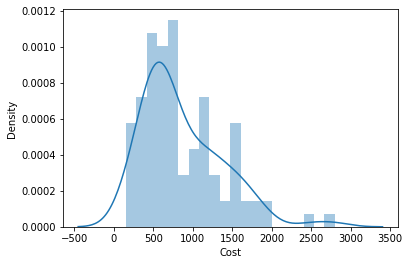

In [68]:
## Let us look at the distribution of the per person costs of the restaurants
sns.distplot(a=names_df['Cost'], bins=20,kde=True,hist = True)

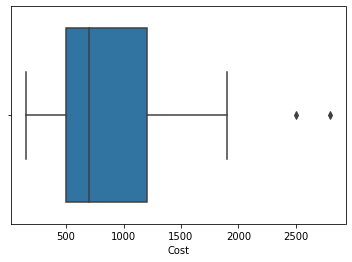

In [69]:
# Boxplot of the cost variable
sns.boxplot(x=names_df['Cost'])

The distribution of cost is positively skewed with a median of around 700 Rs. per person. The restaurants are mostly in the range of 100-2800 Rs. per person.

### 2) Collections

This column has too many missing values(>50%) and it is mainly text based and we have extracted similar and more reliable information from the website in the 'known_for' column. So we can drop this column

In [70]:
names_df.drop('Collections',axis = 1, inplace=True)

### 3) Cuisines

In [71]:
cuisine_count = names_df[['North Indian', 'Chinese', 'Continental/ Mexican',
       'Biryani/Mughlai', 'Asian', 'Fast Food', 'Desserts/ Juices / Bakery',
       'South Indian', 'Seafood', 'Arabian']].sum().reset_index().rename(columns={'index': 'Cuisine',0:'No of Restaurants'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

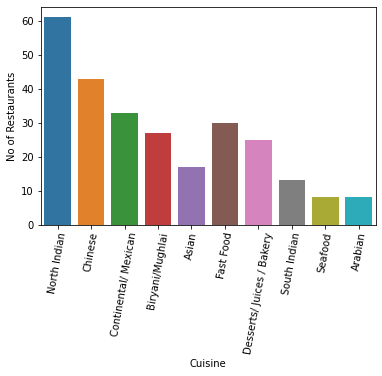

In [72]:
# Bar plot of cuisines
sns.barplot(x=cuisine_count['Cuisine'],y=cuisine_count['No of Restaurants'])
plt.xticks(rotation=80)

* North Indian is the predominant cuisine in Gachibowli Hyderabad. It is offered in 60% of the restaurants in the area. It is followed by Chinese and Conitnental/Mexican cuisine.

### 4) Latitude and Longitude
Let us visualize the locations of the restaurants using maps

In [73]:
# We know from the above table(from names_df.info()) that there is one missing item in the latitude and longitudes. Let us just drop it
names_df.dropna(subset = ['latitude','longitude'],inplace = True)

In [74]:
names_df.shape

(104, 27)

In [75]:
# latitudes and longitudes are currently in the string format. We need to convert them into a numeric format
names_df['latitude'] = names_df['latitude'].astype(float)
names_df['longitude'] = names_df['longitude'].astype(float)

In [76]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[names_df.iloc[3]['latitude'],names_df.iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

In [77]:
# Adding the markers of restaurant locations
for i in names_df.index:
  folium.Marker(location=[names_df.latitude[i], names_df.longitude[i]]).add_to(mapit)

In [78]:
mapit

Majority of the restaurants seem to be located on the old-bombay highway. It is interesting to note that three clear clusters are visible clearly:
1. Along the old bombay highway
2. Below the highway(towards ISB)
3. Above the highway(towards Botanical gardens)

### 5) Binary variables(Has featured and additional services)

In [79]:
# Creating the list of binary variables
bin_vars = ['Has_Featured',
       'Outdoor seating', 'Entertainment', 'Wifi', 'Breakfast',
       'Parking available', 'Seating available', 'Alcohol avialable',
       'Family Friendly', 'Home Delivery', 'Brunch', 'Romantic Dining']

bin_df = round((names_df[bin_vars].sum()/names_df.shape[0])*100,1).reset_index()
bin_df.columns = ['Variable','% of restaurants']
bin_df

,Variable,% of restaurants
0,Has_Featured,26.0
1,Outdoor seating,9.6
2,Entertainment,19.2
3,Wifi,22.1
4,Breakfast,20.2
5,Parking available,29.8
6,Seating available,71.2
7,Alcohol avialable,26.0
8,Family Friendly,7.7
9,Home Delivery,69.2


* Gachibowli seems to be have a lot of very famous restaurants since 26% of the restaurants in this small area alone have featured in the list of Hyderabad's best restaurants.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

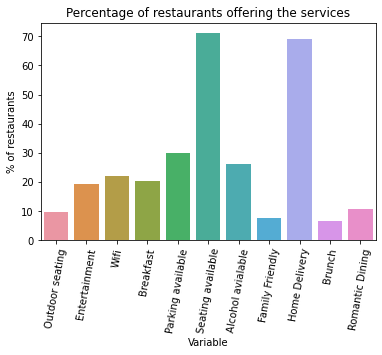

In [80]:
# Let us look at the bar plot of the share of restaurants that offer each of the additional services
sns.barplot(x='Variable',y='% of restaurants',data = bin_df.iloc[1:])
plt.title('Percentage of restaurants offering the services')
plt.xticks(rotation=80)

* It is interesting to note that 70% of the restaurants have home delivery services as well as indoor dining facilities available.

* Parking space is available only in 30% of the restaurants. This is an area for improvement.

## **Univariate analysis of the Reviews data**

In [81]:
review_df.shape

(9955, 12)

In [82]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_review,No_of_Follower,year,month,Month(contd),Quarter
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,2019,5,41,14
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,2019,5,41,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,2019,5,41,14
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,2019,5,41,14
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,2019,5,41,14


### 1) Restaurant column

In [83]:
res_count = review_df['Restaurant'].value_counts().reset_index().rename(columns = {'index':'Restaurant','Restaurant':'No of reviews'})

In [84]:
res_count.sort_values('No of reviews',ascending = False)

,Restaurant,No of reviews
0,Beyond Flavours,100
59,SKYHY,100
68,Flechazo,100
67,Shah Ghouse Hotel & Restaurant,100
66,Over The Moon Brew Company,100
...,...,...
95,Being Hungry,99
96,Olive Garden,99
97,Hyderabad Chefs,98
98,Arena Eleven,85


Every restaurant has almost comparable number of reviews. The no of reviews range from 77 to 100

### 2) Reviewer, No of followers, No of reviews

In [85]:
# Calculating the max number of reviews and number of followers(as per the latest review) of each reviewer
reviewer_info = review_df.groupby('Reviewer').agg({'No_of_review':max, 'No_of_Follower':max}).reset_index()

In [86]:
reviewer_info.shape

(7442, 3)

In [87]:
reviewer_info.head()

,Reviewer,No_of_review,No_of_Follower
0,#FOODPORN,35,5873
1,#chloesviews // CAH,3,1
2,$ign,50,55
3,4mybanti,7,4
4,@FuloriBinaChutneyKaiseBani,86,244


There are 7442 unique reviewers who have given 9550 reviews approximately

In [88]:
reviewer_info.sort_values(['No_of_review','No_of_Follower'],ascending = False, inplace=True)

**Top 10 Critics in The Market (Based on No of Reviews Given)**


Text(0.5, 1.0, 'Top 10 Critics In The Industry (Based On No of Reviews)')

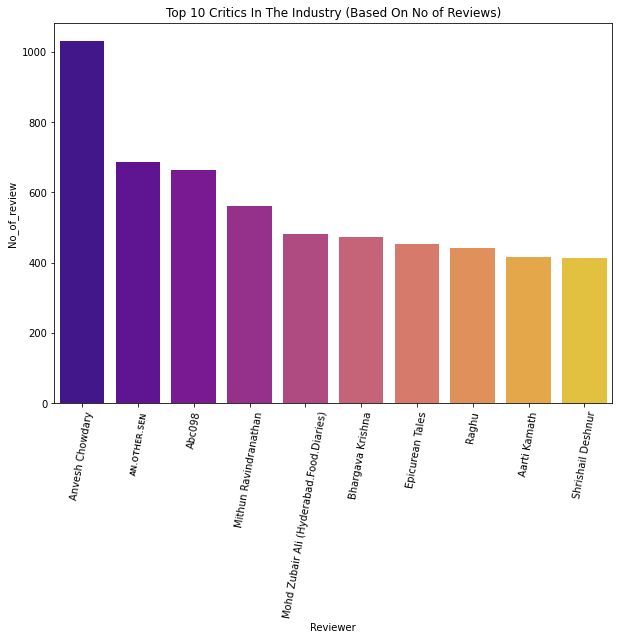

In [89]:
# Let us look at the top 10 critics of the restaurant industry according the number of reviews given
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=reviewer_info.head(10), y='No_of_review', x='Reviewer',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=80)
plt.title('Top 10 Critics In The Industry (Based On No of Reviews)')

**Top 10 Critics in The Market (Based on No of Followers)**

Text(0.5, 1.0, 'Top 10 Critics In The Industry (Based On No of Reviews)')

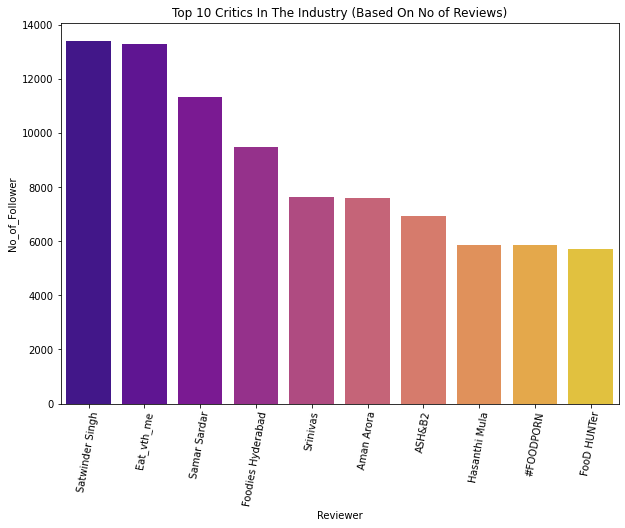

In [90]:
# Let us look at the top 10 critics of the restaurant industry according the number of followers
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=reviewer_info.sort_values('No_of_Follower',ascending=False).head(10), y='No_of_Follower', x='Reviewer',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=80)
plt.title('Top 10 Critics In The Industry (Based On No of Reviews)')

##### Let us dive deeper to find out who can be called a critic. We will try to identify a cutoff for the the number of followers above which we will call that reviewer a critic.

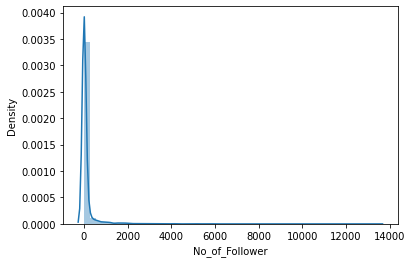

In [91]:
# Let us look at the distribution of number of followers
sns.distplot(a=reviewer_info['No_of_Follower'],hist=True)

* Very large number of reviewers have less than 200 followers. Let us now have a look at the percentiles to see if there is a quantum jump in number of followers at any percentile to decide a cutoff.

In [92]:
reviewer_info.describe(percentiles=[0.75,0.8,0.85,0.9,0.95,0.96,0.97,0.98,0.99])

,No_of_review,No_of_Follower
count,7442.000000,7442.000000
mean,16.522978,116.942892
std,41.431651,509.927936
min,0.000000,0.000000
50%,3.000000,4.000000
75%,11.000000,39.000000
80%,17.000000,60.000000
85%,26.000000,100.000000
90%,44.000000,189.000000
95%,81.000000,547.000000


* We will take 200 followers as the cutoff above which a reviewer will be called a critic since there is significant increase from 90th percentile to 95th. And also it is common sensical that a person having ~200 followers on zomato should be a critic.

In [93]:
critics = list(review_df[review_df['No_of_Follower']>200]['Reviewer'])

In [94]:
len(critics)

1352

So there are 1352 critics in total

### 3) Ratings

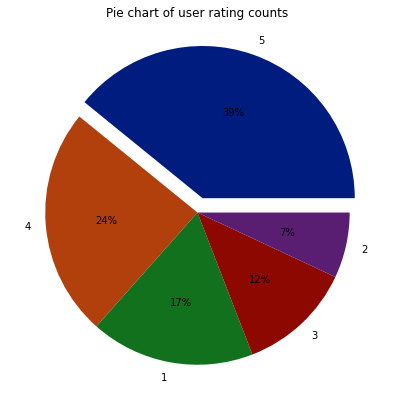

In [95]:
## Let us look at the distribution of the ratings
plt.figure(figsize=(10, 7))
# Rounding off the ratings to nearest upper integers
review_df['Rating'] = review_df['Rating'].apply(lambda x: math.floor(x+0.6))
plot_df = review_df['Rating'].value_counts().reset_index().rename(columns={'index':'Rating','Rating':'count'})

# declaring exploding pie
explode = [0.1, 0, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(plot_df['count'], labels=plot_df['Rating'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.title('Pie chart of user rating counts')
plt.show()

### **Summary of the Univariate Analysis on reviews data**
* There are 9955 reviews in the data set given by 7442 unique users for 100 restaurants in Gachibowli.
* Every restaurant recieved almost comparable number of reviews. The no of reviews range from 77 to 100.
* Out of the 7442 unique reviewers, we have identified 1352 critics who have more than 200 followers
* 39% of the reviews represent 5 star rating. Another 24% are 4 star ratings. So the reviews should largely be skewed towards positive opinions.

#**4) Sentiment Analysis of user reviews**

**Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context.**

In [96]:
# Lets Create Function to Clean Review Text
def clean_review(review):
  '''
  Utility function to clean Review text by removing links, special characters
  using simple regex statements.
  '''
  review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review)
  review = review.lower()
  
  # split to array(default delimiter is " ")
  review = review.split()
  
  # in string array at ith row   
  review = [word for word in review if not word in set(stopwords.words('english'))]             
  
  # rejoin all string array elements
  # to create back into a string
  review = ' '.join(review)   
  
  return review

In [97]:
# Let us write a function to perform lemmatization to convert the given words into rootwords
def lemmatize(text):
  tokens = text.split()
  lemmatizer = WordNetLemmatizer()
  lemmatized_sentence = []

  for word, tag in pos_tag(tokens):
    if tag.startswith('NN'):
      pos = 'n'
    elif tag.startswith('VB'):
      pos = 'v'
    else:
      pos = 'a'
    lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))

  return " ".join(lemmatized_sentence)

In [98]:
def get_sentiment_results(review):
  '''
  Utility function to classify sentiment results of passed Review
  using textblob's sentiment method
  '''
  
  # create TextBlob object of passed Review
  analysis = TextBlob(clean_review(review))
  result = [np.nan]*3

  # set sentiment polarity
  result[0] = analysis.sentiment.polarity

  # set sentiment subjectivity
  result[1] = analysis.sentiment.subjectivity
  
  # set sentiment
  if result[0] > 0:
    result[2] = 'positive'
  elif result[0] == 0:
    result[2] = 'neutral'
  else:
    result[2] = 'negative'
  
  return result

In [99]:
# Get Clean Review Column
review_df['clean_review'] = review_df['Review'].apply(clean_review)

In [100]:
review_df['clean_review'] = review_df['Review'].apply(lemmatize)

In [101]:
sentiment_results = review_df['Review'].apply(get_sentiment_results)
sentiment_results = pd.DataFrame.from_dict(dict(zip(sentiment_results.index, sentiment_results.values))).T
sentiment_results.columns = ['Sentiment_Polarity','Sentiment_Subjectivity','Sentiment']

In [102]:
review_df = pd.concat([review_df,sentiment_results],axis = 1)

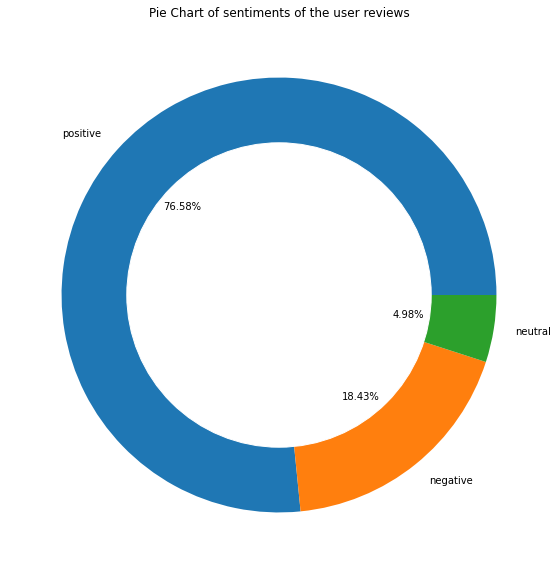

In [103]:
#Lets see pie plot of Overall Customer Sentiment about there Experiance @ Zomato Restaurants
plt.figure(figsize=(10,10))
plt.pie( review_df.Sentiment.value_counts() ,labels=review_df.Sentiment.value_counts().index,autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Pie Chart of sentiments of the user reviews')
plt.show()

So based on sentiment analysis of the review given by customer 
1. Overall 76 % Reviewer have given Positive reviews.
2. 18 % Reviewer have given Negative reviews.  
3. 4.99 % Reviewer have given Neutral reviews. 

Text(0.5, 1.0, 'Histogram of sentiment polarity')

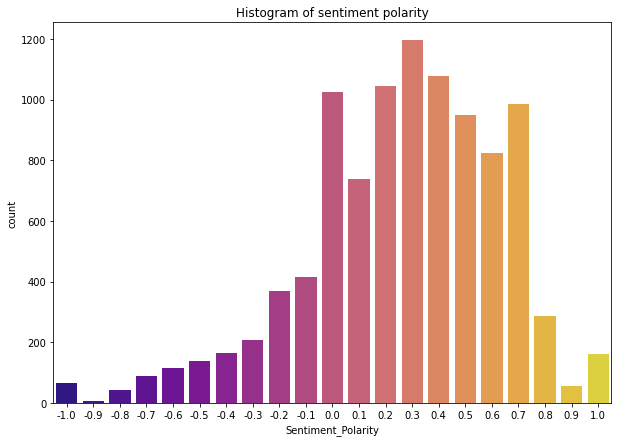

In [104]:
# Histogram of sentiment polarity
review_df['rounded_Sentiment_Polarity'] = review_df['Sentiment_Polarity'].apply(lambda x: round(x,1))
plot_df = review_df['rounded_Sentiment_Polarity'].value_counts().reset_index().rename(columns = {'index':'Sentiment_Polarity','rounded_Sentiment_Polarity':'count'})
review_df.drop('rounded_Sentiment_Polarity',axis = 1, inplace = True)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=plot_df, x="Sentiment_Polarity",y='count', palette="plasma")
plt.title('Histogram of sentiment polarity')

* The distribution of sentiment polarity is negatively skewed. More reviews pertain to positive sentiments.

### **Words used by customer while expressing their Sentiments**

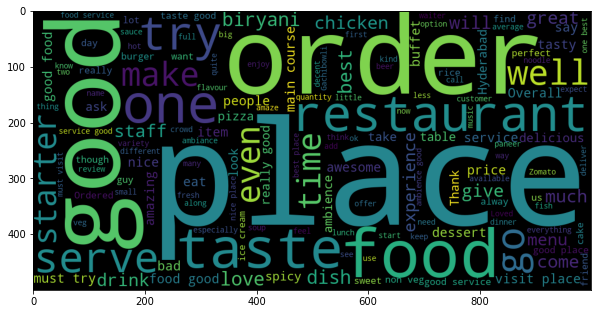

In [105]:
# Lets Findout the frequency or importance of the Words used by customer
from wordcloud import WordCloud
word_cloud = ""
for row in review_df.clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)

* Words used frequently are mostly positve words. This was expected since 74% of the reviews are positive.
* But let us try to see what words are frequently used by the users to express negative sentiments.

### **Words used by customer to express negative sentiments**

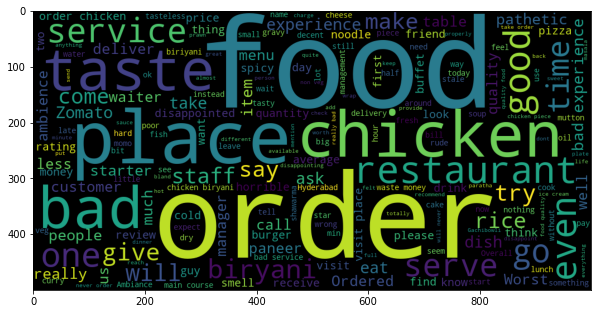

In [106]:
# Lets Findout the frequency or importance of the Words used by customer for negative reviews
from wordcloud import WordCloud
word_cloud = ""
for row in review_df[review_df['Sentiment']=='negative'].clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)

* Staff, service, guy, waiter appear majorly in negative reviews. This indicates that the users are giving bad reviews due to poor service.
* Taste, good are postive words that appear in negative reviews. It is because these words may have been used in combination to negative words(like not good, bad taste) etc.
* From the above cloud we can suggest that the following areas need to be improved:
  * Taste of the food at restaurants
  * Improve staff services at dining restaurants
  * Chicken items appear predominantly in negative reviews, quality and taste of these items need to improve.

## **Summary of Sentiment Analysis**
* 76% of the reviews represent positive sentiments and 18% of them represent negative sentiments. This is in accordance with our earlier results on univariate analysis on ratings column where we saw that 63% of the reviews had a rating of 4 or higher.
* Taste, good are postive words that appear in negative reviews. It is because these words may have been used in combination to negative words(like not good, bad taste) etc.
* Staff, service, guy, waiter, ambience appear majorly in negative reviews. This indicates that the users are giving bad reviews due to poor dining experience.
* Frequent use of words like Chicken, rice, biryani, food, dish in negative indicate that the chicken based items are predominant concerns of users.

# **5. MultiVariate Analysis**

### **1.Top 10 (Most Popular) Restaurants based on Rating**

In [107]:
df = review_df.groupby(by ='Restaurant')['Sentiment_Polarity','Sentiment_Subjectivity','Rating'].agg({'Sentiment_Polarity':mean,'Sentiment_Subjectivity':mean,'Rating':mean}).reset_index()
df.rename(columns={'Sentiment_Polarity':'Mean_Sentiment_Polarity','Sentiment_Subjectivity':'Mean_Sentiment_Subjectivity','Rating':'Avg_Rating'},inplace = True)
df.sort_values('Avg_Rating',ascending = False,inplace = True)

Text(0.5, 1.0, 'Top 10 (Most Popular) Restaurants based on Rating')

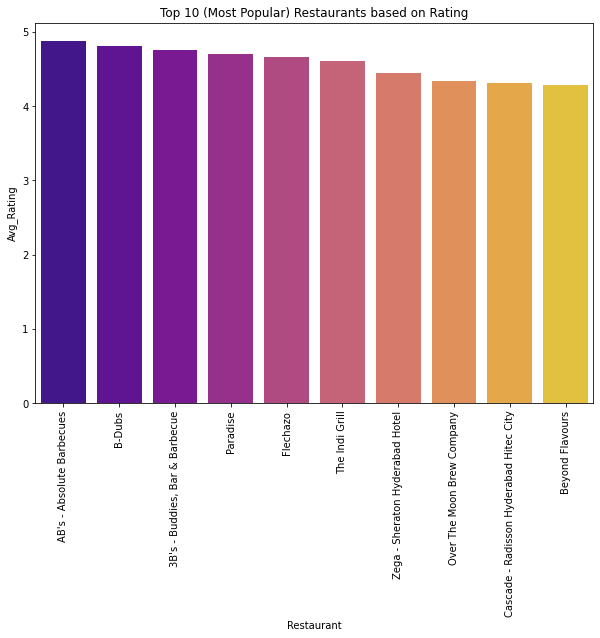

In [108]:
# Top 10 (Most Popular) Restaurants based on Rating
plt.figure(figsize=(10, 7))
plot=sns.barplot(data= df.head(10), x="Restaurant",y='Avg_Rating', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 (Most Popular) Restaurants based on Rating')

- AB's-Absoulute Barbecues received the highest rating in Gachibowli. It was followed by BDubs and 3B's.
- Let us see the list of restaurants that received the least ratings.

### **2. 10 least Popular Restaurants based on Rating**

Text(0.5, 1.0, '10 least Popular Restaurants based on Rating')

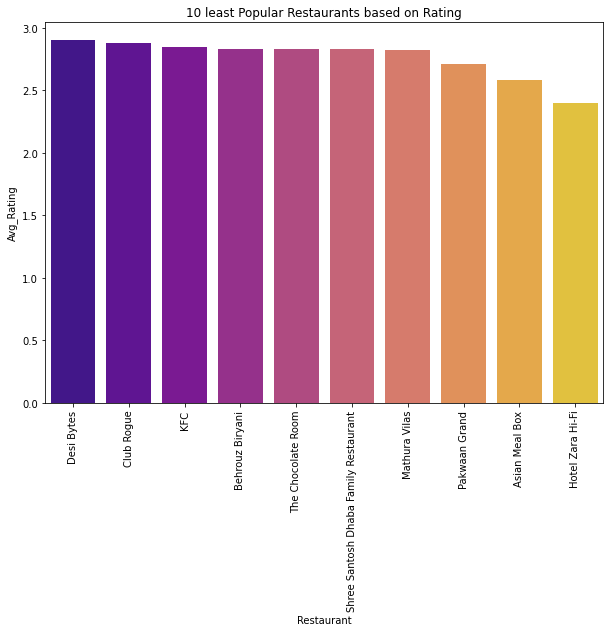

In [109]:
# 10 least Popular Restaurants based on Rating
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=df.tail(10), x="Restaurant",y='Avg_Rating', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('10 least Popular Restaurants based on Rating')

In [110]:
mean(review_df['Rating'])

3.6076343545956804

* Restaurant Zara Hi-Fi received the least average rating followed by Asian Meal Box and Pakwan Grand.

* The ratings of these restaurants is less than the average rating of all restaurants by almost 0.75 points. 

* It is interesting to note that popular food chains like KFC and Behrouz biryani infamously feature in this list.

Let us look at the best and worst reviewed restaurants according to the critics of the industry.

###**3.Top 10 Restaurants that receive highest average ratings from critics**

Text(0.5, 1.0, 'Top 10 Restaurants that receive highest average ratings from critics')

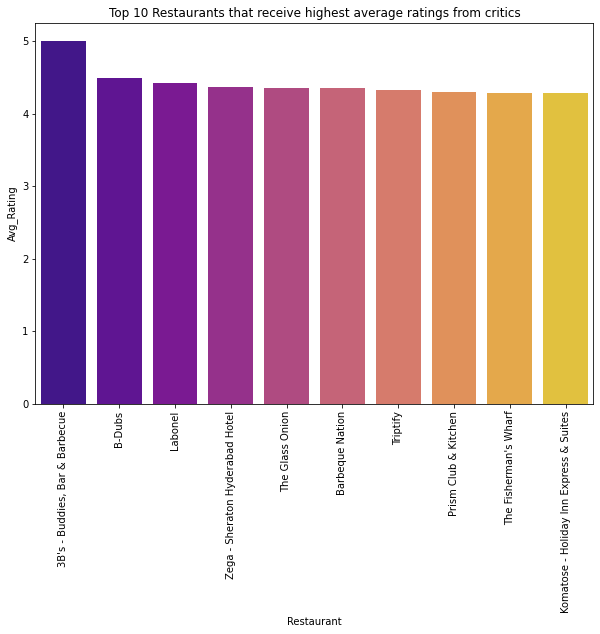

In [111]:
# Top 10 Restaurants that receive highest average ratings from critics
df2 = review_df[review_df['No_of_Follower']>200].groupby(by ='Restaurant')['Sentiment_Polarity','Sentiment_Subjectivity','Rating'].agg({'Sentiment_Polarity':mean,'Sentiment_Subjectivity':mean,'Rating':mean}).reset_index()
df2.rename(columns={'Sentiment_Polarity':'Mean_Sentiment_Polarity','Sentiment_Subjectivity':'Mean_Sentiment_Subjectivity','Rating':'Avg_Rating'},inplace = True)
df2.sort_values('Avg_Rating',ascending = False,inplace = True)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data= df2.head(10), x="Restaurant",y='Avg_Rating', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 Restaurants that receive highest average ratings from critics')

### **4. Bottom 10 Restaurants that receive lowest average ratings from critics**

Text(0.5, 1.0, 'Bottom 10 Restaurants that receive lowest average ratings from critics')

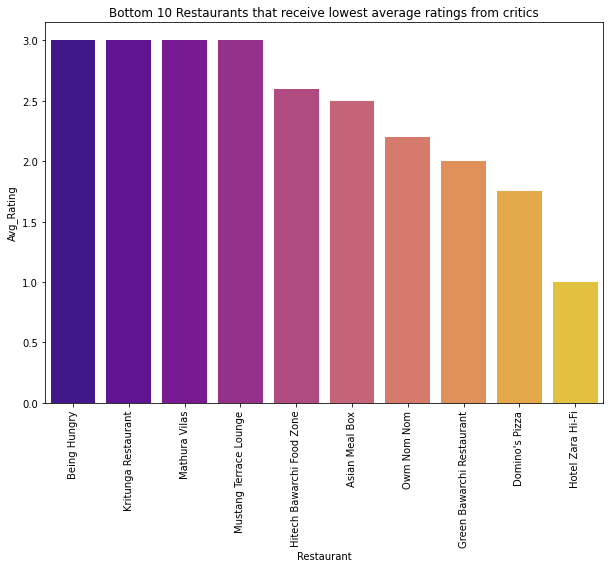

In [112]:
# Bottom 10 Restaurants that receive lowest average ratings from critics
plt.figure(figsize=(10, 7))
plot=sns.barplot(data= df2.tail(10), x="Restaurant",y='Avg_Rating', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Bottom 10 Restaurants that receive lowest average ratings from critics')

In [113]:
# Restaurants that feature in top 10 most popular lists according to critics as well as overall
for i in df.head(10)['Restaurant']:
  if i in list(df2.head(10)['Restaurant']):
    print(i)

B-Dubs
3B's - Buddies, Bar & Barbecue
Zega - Sheraton Hyderabad Hotel


In [114]:
# Restaurants that feature in bottom 10 least popular lists according to critics as well as overall
for i in df.tail(10)['Restaurant']:
  if i in list(df2.tail(10)['Restaurant']):
    print(i)

Mathura Vilas
Asian Meal Box
Hotel Zara Hi-Fi


### **5. Does sentiment polarity and subjectivity relate to the number of pictures posted in a review?**

Text(0.5, 1.0, 'Sentiment Score Vs No of Picture Shared By Customer')

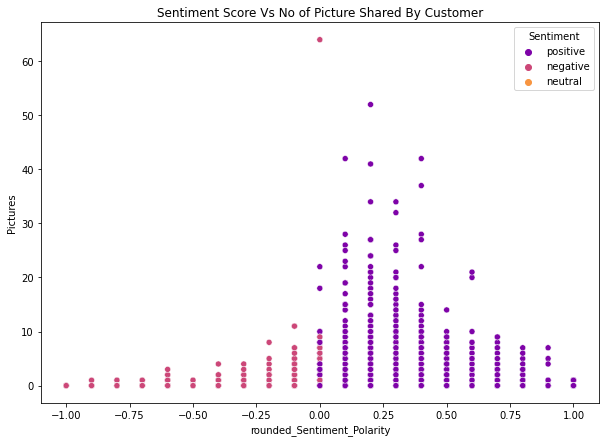

In [115]:
# 'Sentiment polarity Vs No of Picture Shared By Customer'
review_df['rounded_Sentiment_Polarity'] = review_df['Sentiment_Polarity'].apply(lambda x: round(x,1))
plt.figure(figsize=(10,7))
sns.scatterplot(x="rounded_Sentiment_Polarity", y="Pictures",
                hue="Sentiment", palette="plasma",data=review_df)
plt.title('Sentiment Score Vs No of Picture Shared By Customer')

### **6. Sentiment polarity Vs No of Picture Shared By Customer**

Text(0.5, 1.0, 'Sentiment Score Vs No of Picture Shared By Customer')

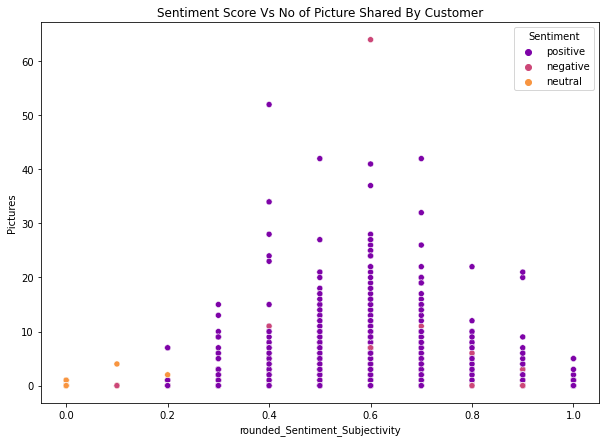

In [116]:
# 'Sentiment polarity Vs No of Picture Shared By Customer'
review_df['rounded_Sentiment_Subjectivity'] = review_df['Sentiment_Subjectivity'].apply(lambda x: round(x,1))
plt.figure(figsize=(10,7))
sns.scatterplot(x="rounded_Sentiment_Subjectivity", y="Pictures",
                hue="Sentiment", palette="plasma",data=review_df)
plt.title('Sentiment Score Vs No of Picture Shared By Customer')

* It was expected that reviews with pictures may indicate more extreme reviews and more subjective reviews. But, the above graphs does not show any significant relation to prove this. Though, this does not mean the expectation is incorrect.

### **Let us look at the geographical location of restaurants according to cost to see if there are any clusters we can identify.**

### **7. Per person estimated Cost of dining at different Location of Restaurants**

Text(0.5, 1.0, 'Per person estimated Cost of dining at different Location of Restaurants')

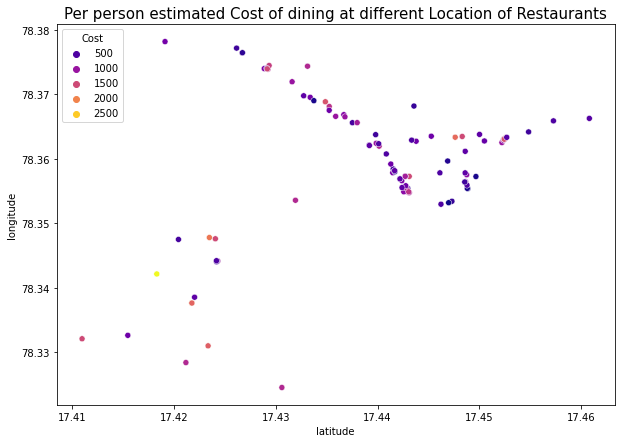

In [117]:
# Per person estimated Cost of dining at different Location of Restaurants
plt.figure(figsize=(10,7))
sns.scatterplot(x="latitude", y="longitude",
                hue="Cost", palette="plasma",data=names_df)
plt.title('Per person estimated Cost of dining at different Location of Restaurants',fontsize = 15)

* No significant clusters are available geographically according to cost.

#### Let us look at the 10 most expensive and least expensive restaurants.

### **8. Top 10 most expensive restaurants in Hyderabad**

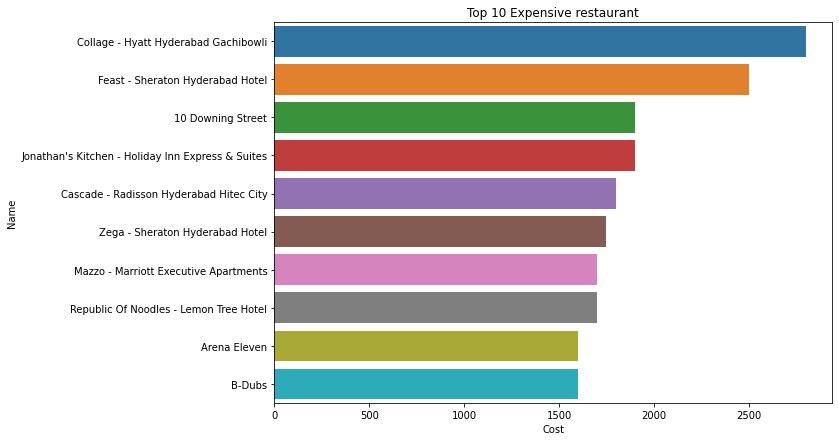

In [118]:
# checking for most expensive Restaurant
plt.figure(figsize=(10,7))
plot = sns.barplot(x='Cost',
            y="Name", 
            data=names_df, 
            order=names_df.sort_values('Cost',ascending=False).Name[:10])
plt.title('Top 10 Expensive restaurant')
plt.show()

### **9. 10 Most Affordable restaurant Restaurant in Hyderabad**

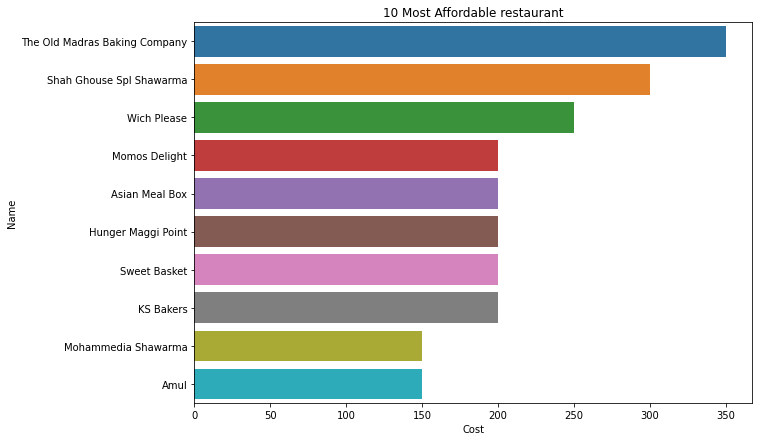

In [119]:
# checking for 10 Most Affordable restaurant Restaurant
plt.figure(figsize=(10,7))
plot = sns.barplot(y="Name",
            x='Cost', 
            data=names_df, 
            order=names_df.sort_values('Cost',ascending=False).Name[-10:])
plt.title('10 Most Affordable restaurant')
plt.show()

* Let us explore if there is any significant variation in average user rating according to the per person cost of the restaurant

In [120]:
df.head()

,Restaurant,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Avg_Rating
3,AB's - Absolute Barbecues,0.587395,0.715231,4.88
11,B-Dubs,0.497512,0.644784,4.81
2,"3B's - Buddies, Bar & Barbecue",0.518821,0.684991,4.76
67,Paradise,0.476557,0.663962,4.70
35,Flechazo,0.526417,0.661154,4.66


In [121]:
# Finding the number of reviews and number of postive reviews received by each restaurant
total = review_df['Restaurant'].value_counts().reset_index().rename(columns = {'index':'Restaurant','Restaurant':'no_of_reviews'})
pos = review_df[review_df['Sentiment']=='positive']['Restaurant'].value_counts().reset_index().rename(columns = {'index':'Restaurant','Restaurant':'no_of_positive_reviews'})
comb = pd.merge(left=total,right = pos,on= 'Restaurant',how='inner')
comb['percent_of_positve_reviews'] = comb['no_of_positive_reviews']/comb['no_of_reviews']
comb.head()

,Restaurant,no_of_reviews,no_of_positive_reviews,percent_of_positve_reviews
0,Beyond Flavours,100,91,0.91
1,PourHouse7,100,86,0.86
2,Urban Asia - Kitchen & Bar,100,79,0.79
3,The Indi Grill,100,99,0.99
4,The Tilt Bar Republic,100,90,0.90


### **10. Cost Vs Average Rating**

Text(0.5, 1.0, 'Scatter plot of cost vs avg rating')

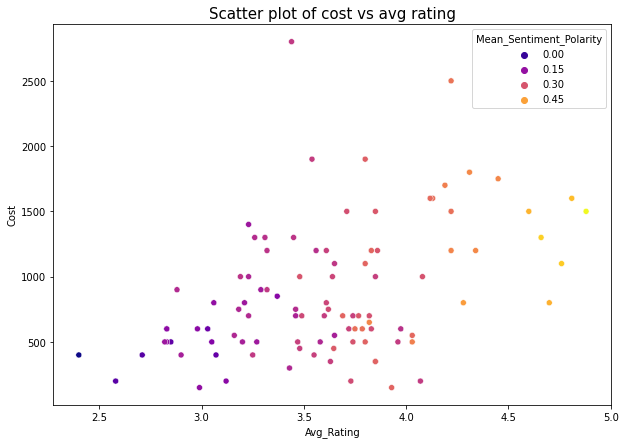

In [122]:
# Merging the names_df data frame with this dataframe obtained from the sentiment analysis on user reviews
merged_df = pd.merge(left = df, right=names_df,how = 'inner',left_on = 'Restaurant',right_on = 'Name')
merged_df = pd.merge(left = merged_df, right = comb,how='inner',on='Restaurant')
# Scatter plot of cost vs avg rating
plt.figure(figsize=(10,7))
sns.scatterplot(x="Avg_Rating", y="Cost", hue = 'Mean_Sentiment_Polarity',
                palette="plasma",data=merged_df)
plt.title('Scatter plot of cost vs avg rating',fontsize = 15)

* There is a slightly positive correlation between average rating and cost per person of a restaurant. It means costly restaurants are performing better than cheaper restaurants.
* Further study and analysis needs to be done to find out the issue.

## **Summary of Multivariate Analysis**
* AB's-Absoulute Barbecues received the highest rating in Gachibowli. It was followed by BDubs, 3B's, Paradise and Flechazo.
* Restaurant Zara Hi-Fi received the least average rating followed by Asian Meal Box, Pakwan Grand, Mathura Vilas and Shree Santosh Dhaba. The ratings of these restaurants is less than the average rating of all restaurants by almost 0.75 points.
* It is interesting to note that popular food chains like KFC and Behrouz biryani infamously feature in the list of 10 least popular restaurants in Gachibowli according to average user rating. But when we consider the reviews given by critics only, these restaurants does not appear in the least popular list.
* B-Dubs, 3B’s, Zega are the restaurants that are among the top 10 both according to critics as well as overall public.
* Mathura Vilas, Asian meal box, Hotel Zara Hi-Fi feature in the list of 10 least popular restaurants according to critics as well as general public.
* The restaurants are evenly distributed spatially with respect to cost. There does not seem any correlation between the cost of a restaurant and its geographic location.
* Collage(Hyatt Hyderabad) is the most expensive restaurant in Gachibowli costing 2800 Rs. per person. It is followed by Feast(Sheraton Hyderabad) and 10 downing street restaurant.
* All of the 10 least expensive restaurants cost less than 350 Rs per person. Infact, 7 of the least expensive ones cost less than 200 Rs. per person. According to Indian food market standards, the restaurants listed in Zomato in Gachibowli are relatively costly options. Inclusion of more cheaper restaurants may help improve the user base of Zomato.
* There is a slightly positive correlation between average rating and cost per person of a restaurant. It means customers are more satisfied with the costlier restaurants than with the cheaper restaurants.


# **6. Clustering of Restaurants**

In [123]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       104 non-null    object 
 1   Cost                       104 non-null    int64  
 2   latitude                   104 non-null    float64
 3   longitude                  104 non-null    float64
 4   Has_Featured               104 non-null    float64
 5   Outdoor seating            104 non-null    int64  
 6   Entertainment              104 non-null    int64  
 7   Wifi                       104 non-null    int64  
 8   Breakfast                  104 non-null    int64  
 9   Parking available          104 non-null    int64  
 10  Seating available          104 non-null    int64  
 11  Alcohol avialable          104 non-null    int64  
 12  Family Friendly            104 non-null    int64  
 13  Home Delivery              104 non-null    int64  

### **1. Clustering Based on the Location of Restaurants**

In [124]:
# Taking the subset of the data required for the analysis
geo_cluster_df = names_df.loc[0:,['Name','latitude','longitude']].set_index('Name')
geo_cluster_df.dropna(inplace=True)

In [125]:
# Lets standerdize the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
clust_arr=sc.fit_transform(geo_cluster_df)
geo_cluster_df = pd.DataFrame(clust_arr , columns= geo_cluster_df.columns.to_list())

In [126]:
geo_cluster_df.head()

,latitude,longitude
0,-0.990903,1.420265
1,0.283924,-0.208169
2,-0.388972,0.869987
3,-1.194567,1.650263
4,0.073681,0.293638


Text(0.5, 1.0, 'geographical distribution of the restaurants')

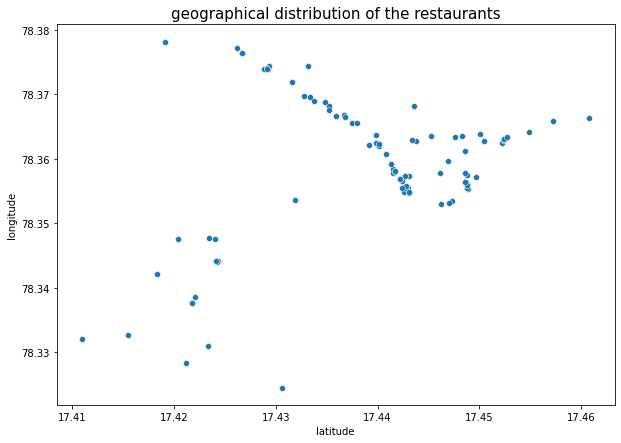

In [127]:
# Before going into the clustering further, let us have a look at the geographical distribution of the restaurants again
plt.figure(figsize=(10,7))
sns.scatterplot(x="latitude", y="longitude",
                palette="plasma",data=names_df)
plt.title('geographical distribution of the restaurants',fontsize = 15)

Looking at the data, we can observe two or three clusters. We do see a well separated boundary between the visible clusters. So let us start with a simple k-means clustering algorithm.

### **K Means Clustering Algorithm for forming geographical clusters**

In [128]:
# K Means Clustering Algorithm for forming geographical clusters
# Initiating empty lists for storing different evaluation metrics
inertia=[]
silhouette_scorelist = []
distortions = []

# Applying the k-mean clustering algorithm with k values(number of clusters) ranging from 1-10
for i in range(1,11):
  kmeans= KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(geo_cluster_df)
  inertia.append(kmeans.inertia_)
  y_kmeans = kmeans.predict(geo_cluster_df)
  distortions.append(sum(np.min(cdist(geo_cluster_df, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / geo_cluster_df.shape[0])
  if i >1:
    silhouette_avg = silhouette_score(geo_cluster_df, y_kmeans)
    silhouette_scorelist.append(silhouette_avg)

In [129]:
# Lets from dataframe of different Metrices like Inertia, distortion & silhouette_score
df= pd.DataFrame({'No_cluster': range(1,11),'Inertia' : inertia, 'Distortions' : distortions, 'silhouette_score': [np.nan]+silhouette_scorelist})
df

,No_cluster,Inertia,Distortions,silhouette_score
0,1,208.000000,1.167402,NaN
1,2,91.376258,0.811447,0.637160
2,3,40.851704,0.560356,0.596808
3,4,27.915488,0.424182,0.546304
4,5,21.447772,0.357335,0.544819
5,6,15.673342,0.318698,0.521747
6,7,12.920688,0.270483,0.514769
7,8,10.446276,0.234631,0.554371
8,9,9.038277,0.222308,0.553269
9,10,7.955019,0.210310,0.535553


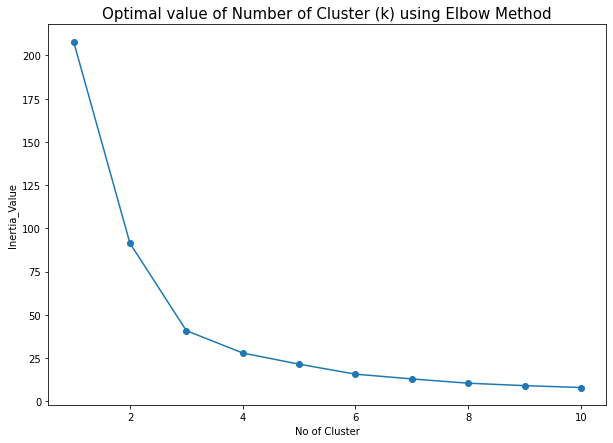

In [130]:
# Lets find optimal value of Number of Cluster (k) using Elbow Method. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.Inertia, marker = 'o')
plt.ylabel('Inertia_Value')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using Elbow Method',fontsize=15)
plt.show()

So, according Elbow method, optimum number of cluster(k) will be 3 since the curve almost tapers out after k = 3. Let us also look at the silhouette analysis.

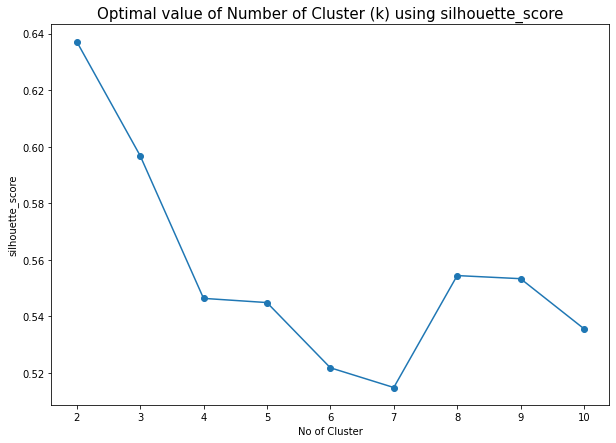

In [131]:
# # Lets find optimal value of Number of Cluster (k) using silhouette_score. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.silhouette_score, marker = 'o')
plt.ylabel('silhouette_score')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using silhouette_score',fontsize=15)
plt.show()

For the cluster value of k= 2 or 3, silhouette score is reasonably high. Let us look at the Silhouette plot and cluster visualization for k=2 and k=3.

For n_clusters = 2 The average silhouette_score is : 0.6371597209436922
For n_clusters = 3 The average silhouette_score is : 0.5968079274777695


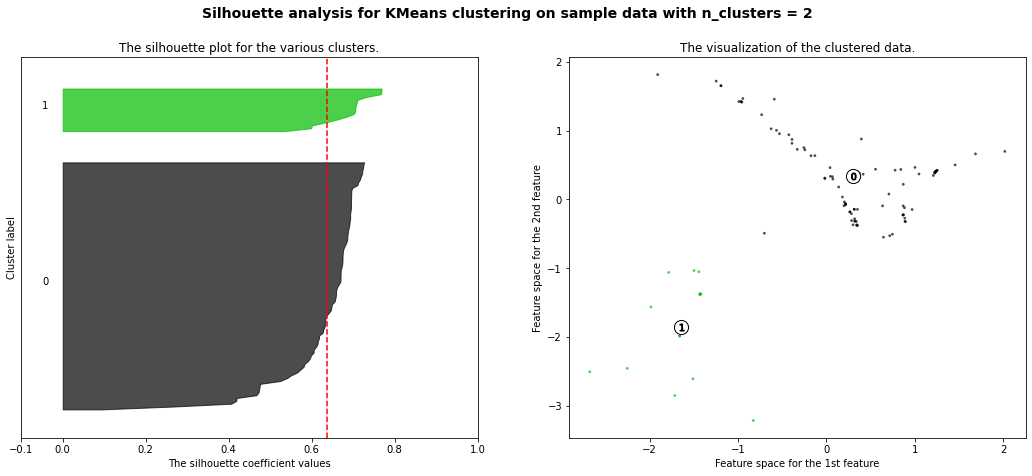

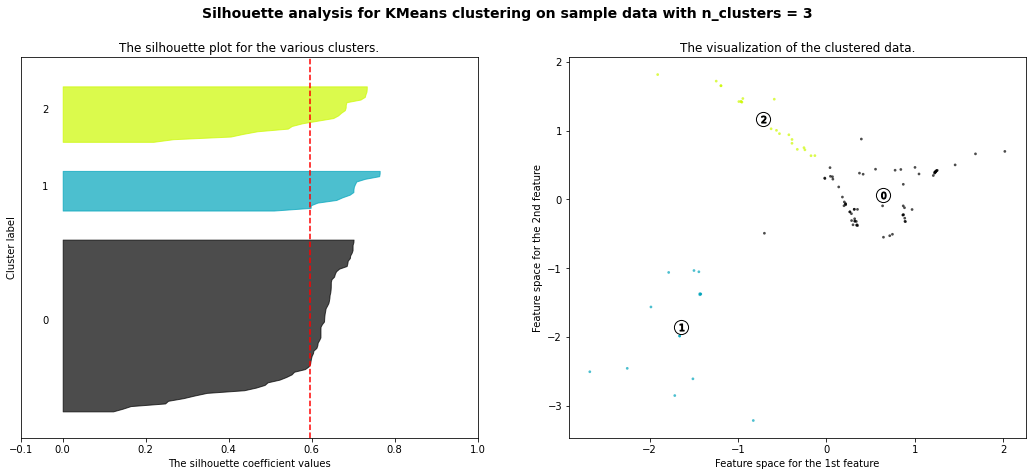

In [132]:
# Lets do Silhouette analysis for K Means clustering Algorithem and find optimum number of cluster(k)
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2,3]
X = clust_arr
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Looking at the clusters and cluster centers for k=2 and k=3, the cluster division for k=3 is more robust. So we will cluster the restaurants geographically into three clusters.

In [133]:
# So now lets fit the K means Clustering Algorithem for  optimal number of clusters (n_cluster = 3)
kmeans= KMeans(n_clusters = 3,init="k-means++")
kmeans.fit(geo_cluster_df)
# Predicted values of clusters
y_kmeans = kmeans.predict(geo_cluster_df)
y_kmeans

array([2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1], dtype=int32)

In [134]:
names_df.shape, len(y_kmeans)

((104, 27), 104)

In [135]:
names_df['Geo Clusters'] = y_kmeans

In [136]:
# writing the names_df dataframe to a csv to store the cluster indices for further use
#names_df.to_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/names_df_v4.csv')

In [137]:
# Reading the names_df dataframe from the csv file stored in previous iteration(to maintain consistency in cluster labels in every iteration)
names_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/names_df_v4.csv')

In [138]:
names_df.columns

Index(['Unnamed: 0', 'Name', 'Cost', 'latitude', 'longitude', 'Has_Featured',
       'Outdoor seating', 'Entertainment', 'Wifi', 'Breakfast',
       'Parking available', 'Seating available', 'Alcohol avialable',
       'Family Friendly', 'Home Delivery', 'Brunch', 'Romantic Dining',
       'no of services', 'North Indian', 'Chinese', 'Continental/ Mexican',
       'Biryani/Mughlai', 'Asian', 'Fast Food', 'Desserts/ Juices / Bakery',
       'South Indian', 'Seafood', 'Arabian', 'Geo Clusters'],
      dtype='object')

### **Number of restaurants in each  Geographical Cluster**

Text(0.5, 1.0, 'Number of Restaurants in different Clusters')

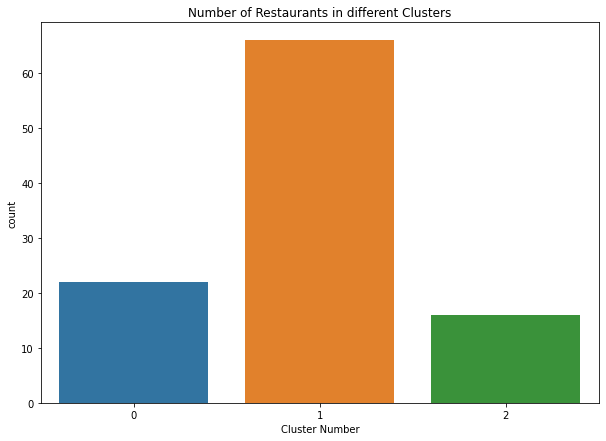

In [139]:
# Lets find out the number of restaurants in each Cluster
plt.figure (figsize = (10,7))
p=sns.countplot(names_df['Geo Clusters'])
p.set_xlabel('Cluster Number')
plt.title("Number of Restaurants in different Clusters")

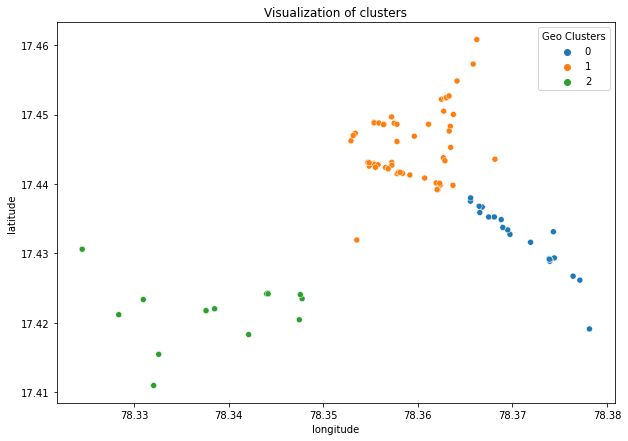

In [140]:
# Visualization of clusters
plt.figure(figsize=(10,7))
sns.scatterplot(data=names_df, x='longitude', y = 'latitude', hue ='Geo Clusters',palette ="tab10")
plt.title("Visualization of clusters", fontsize=12)
plt.show()

Let us look at the clusters in a map to assign area name to the clusters obtained from the k-means clustering above

In [141]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[names_df.iloc[3]['latitude'],names_df.iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

# Adding the markers of restaurant locations
for i in names_df.index:
  if names_df.loc[i,'Geo Clusters'] == 0:
    icon_name = folium.Icon(color='purple',icon='none') 
  elif names_df.loc[i,'Geo Clusters'] == 1:
    icon_name = folium.Icon(color='red',icon='none')
  else:
    icon_name = folium.Icon(color='green',icon='none')
  folium.Marker(location=[names_df.latitude[i], names_df.longitude[i]],icon=icon_name).add_to(mapit)

mapit

* Looking at the above map, we can name the three geographical clusters we obtained as follows:
  * Cluster 0: Old Bombay Rd(between Khajaguda Jn and ORR Jn) - Purple points above
  * Cluster 1: Old Bombay Rd(between ORR junction and ISB Junction) - Red points above
  * Cluster 2: Near Wipro and ISB - green points above

* Now let us add the cluster name column to the names_df dataframe

In [142]:
geo_clust_names = {
    0: 'Old Bombay Rd(between Khajaguda Jn and ORR Jn)',
    1: 'Old Bombay Rd(between ORR junction and ISB Junction)',
    2: 'Near Wipro and ISB'
}

In [143]:
names_df['Geo Cluster Name'] = names_df['Geo Clusters'].apply(lambda x: geo_clust_names[x])

* Let us now look at the cluster profiles of the geographical clusters we just obtained.
* We will look at the number of restaurants, average rating, average cost, range of cost, mean sentiment polarity and percentage of positive reviews in each geographical cluster.

In [144]:
# Let us add the geographical clusters column to the merged dataframe
merged_df = pd.merge(left = merged_df, right = names_df[['Name','Geo Cluster Name']],on = 'Name',how = 'inner')

In [145]:
# Creating the cluster profile dataframe
count_df = merged_df[['Geo Cluster Name','Restaurant']].groupby('Geo Cluster Name').count().reset_index().rename(columns={'Restaurant':'No of restaurants'})
other_df = merged_df.groupby('Geo Cluster Name').agg({'Cost':[mean,min,max],
                                                  'Avg_Rating':mean,
                                                  'Mean_Sentiment_Polarity':mean,
                                                  'no_of_reviews':sum,
                                                  'no_of_positive_reviews':sum
                                                  }).reset_index()
other_df.columns = ['Geo Cluster Name','Avg Cost','Min Cost','Max Cost','Avg Rating','Mean Sentiment Polarity','No of reviews','No of positive reviews']
other_df['Percentage of positive reviews'] = round(100*(other_df['No of positive reviews']/other_df['No of reviews']),1)
other_df.drop(['No of positive reviews','No of reviews'],axis = 1, inplace = True)
cluster_profile_geo_df = pd.merge(left = count_df, right = other_df,on = 'Geo Cluster Name',how='inner')

In [146]:
cluster_profile_geo_df

,Geo Cluster Name,No of restaurants,Avg Cost,Min Cost,Max Cost,Avg Rating,Mean Sentiment Polarity,Percentage of positive reviews
0,Near Wipro and ISB,14,1342.857143,400,2800,3.786227,0.294299,82.7
1,Old Bombay Rd(between Khajaguda Jn and ORR Jn),21,914.285714,300,1600,3.639134,0.261082,77.6
2,Old Bombay Rd(between ORR junction and ISB Jun...,64,746.875000,150,1900,3.564443,0.257153,74.8


* We can infer the following insights from the above cluster profiling:
  * Restaurants near Wipro and ISB are relatively costlier than others in Gachibowli.
  * The average ratings of all the clusters is almost identical. But, looking at the average cost of each cluster, the restaurants in the Old Bombay Rd(between ORR junction and ISB Junction) offer the highest benefit for the cost on average.
  * Most of the restaurants are located in the Old Bombay Rd(between ORR junction and ISB Junction). So users can find a lot of options within this small stretch.

* Let us now try to classify the restaurants to do a cost to benefit analysis. Since the scope of the study is limited to a small area of Gachibowli in Hyderabad city(we have only 100 restaurants in our dataset), we will take all the restaurants together for this analysis instead of doing it for each geographical cluster obtained above.

### **2. Clustering Based on the Dining Cost per Person & Rating of Restaurants**

In [147]:
# Variables list for clustering
clust_vars = ['Restaurant',
              'Cost',
              'Avg_Rating']

# Creating the dataset for clustering
clust_df = merged_df[clust_vars]
clust_df = clust_df.set_index('Restaurant')
clust_df.dropna(inplace=True)
clust_df.head()

,Cost,Avg_Rating
Restaurant,,
AB's - Absolute Barbecues,1500,4.88
B-Dubs,1600,4.81
"3B's - Buddies, Bar & Barbecue",1100,4.76
Paradise,800,4.70
Flechazo,1300,4.66


Text(0.5, 1.0, 'Scatter plot of cost and average rating')

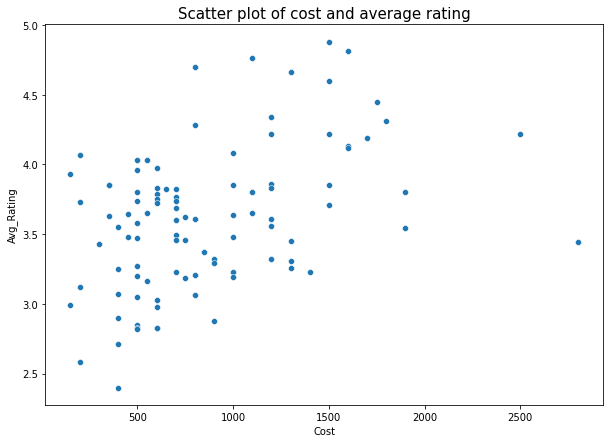

In [148]:
# Let us visualize the data
plt.figure(figsize=(10,7))
sns.scatterplot(x="Cost", y="Avg_Rating",
                palette="plasma",data=clust_df)
plt.title('Scatter plot of cost and average rating',fontsize = 15)

The data is evenly distributed with some visible globular clusters with noise, so a simple k-means clustering algorithm should be suitable. Let us implement it and look at the cluster profiles.

In [149]:
# Lets standerdize the each features for Uniformity of values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
clust_arr=sc.fit_transform(clust_df)
clust_df = pd.DataFrame(clust_arr , columns= clust_df.columns.to_list())

In [150]:
clust_df.shape

(99, 2)

### **1. Clustering By K-means clustering algorithm**

In [151]:
#  Lets fit K-means clustering algorithm
inertia=[]
silhouette_scorelist = []
distortions = []
cluster_indices = dict()
for i in range(1,11):
  kmeans= KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(clust_df)
  inertia.append(kmeans.inertia_)
  y_kmeans = kmeans.predict(clust_df)
  distortions.append(sum(np.min(cdist(clust_df, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / clust_df.shape[0])
  if i >1:
    silhouette_avg = silhouette_score(clust_df, y_kmeans)
    silhouette_scorelist.append(silhouette_avg)
  cluster_indices.update({i:y_kmeans})

In [152]:
# Lets from dataframe of different Metrices like Inertia, distortion & silhouette_score
df= pd.DataFrame({'No_cluster': range(1,11),'Inertia' : inertia, 'Distortions' : distortions, 'silhouette_score': [np.nan]+silhouette_scorelist})
df

,No_cluster,Inertia,Distortions,silhouette_score
0,1,198.000000,1.221515,NaN
1,2,101.245055,0.901409,0.479862
2,3,70.377532,0.708455,0.383582
3,4,51.098709,0.589338,0.429884
4,5,37.024570,0.548367,0.452404
5,6,31.746393,0.500612,0.393002
6,7,27.647912,0.472599,0.413101
7,8,24.333030,0.444205,0.362619
8,9,21.232703,0.419976,0.330116
9,10,19.387912,0.396332,0.320168


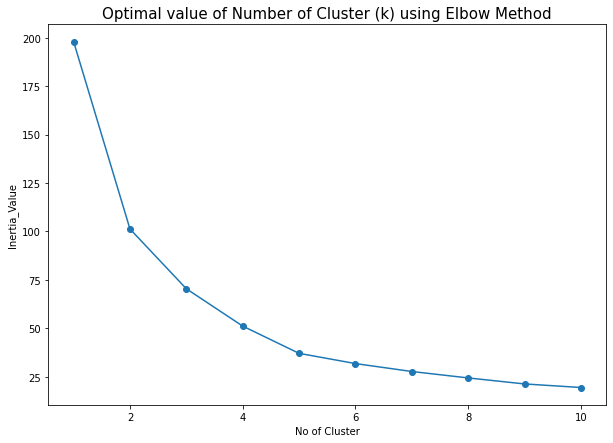

In [153]:
# Lets find optimal value of Number of Cluster (k) using Elbow Method. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.Inertia, marker = 'o')
plt.ylabel('Inertia_Value')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using Elbow Method',fontsize=15)
plt.show()

From the above graph, optimal number of clusters can be between 2 to 5(inclusive). Let us look at the silhouette analysis.

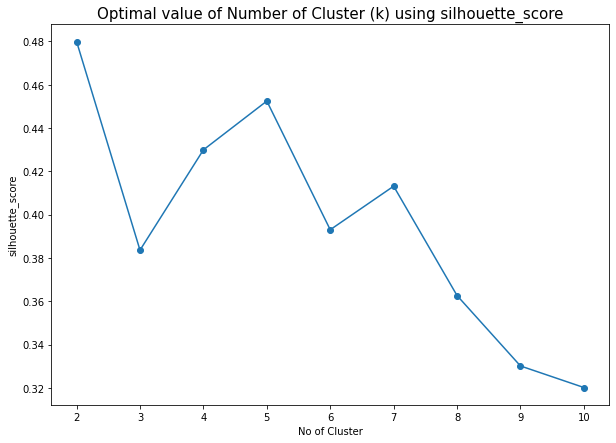

In [154]:
# # Lets find optimal value of Number of Cluster (k) using silhouette_score. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.silhouette_score, marker = 'o')
plt.ylabel('silhouette_score')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using silhouette_score',fontsize=15)
plt.show()

Silhouette score is high for k=[2,4,5]. Since K=2 means two clusters which would classify the restaurants into two custers only, it will not be useful for a good cost to benefit analysis. So let us look at the visualizations for k=4 or 5 = to choose optimal number of clusters for this problem.

In [155]:
# Adding the cluster labels for k=4 and k=5 to the merged dataframe
merged_df['cb_cluster_4'] = cluster_indices[4]
merged_df['cb_cluster_5'] = cluster_indices[5]

In [156]:
# writing the merged_df dataframe to a csv file to read it again to maintain the same cluster labels in every iteration of running this notebook
#merged_df.to_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/merged_df.csv')

# Reading the merged_df dataframe from the previous iteration
merged_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/merged_df.csv')

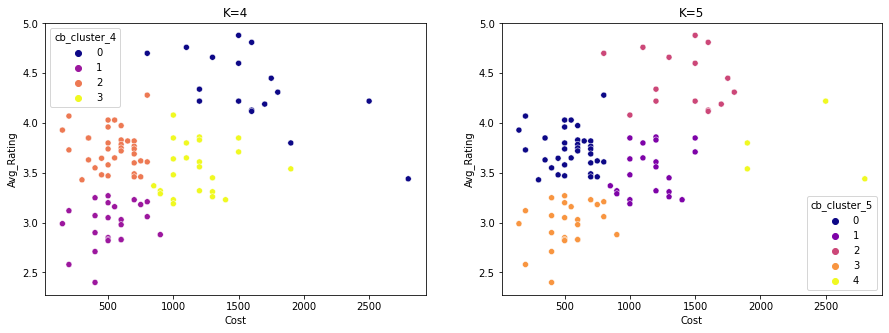

In [157]:
# Plot constraints
fig, axes = plt.subplots(1, 2,figsize=(15, 5))

# K=4
sns.scatterplot(ax=axes[0], x=merged_df['Cost'], y=merged_df['Avg_Rating'],hue=merged_df['cb_cluster_4'],palette='plasma')
axes[0].set_title('K=4')

# K=5
sns.scatterplot(ax=axes[1], x=merged_df['Cost'], y=merged_df['Avg_Rating'],hue=merged_df['cb_cluster_5'],palette='plasma')
axes[1].set_title('K=5')

plt.show()

* Looking at the above plots, we can see that there is very little difference between the clustering for k=4 and k=5. For k=5 the algorithm tried to fit the outlier points on the super high cost side and make them a separate category. In reality, these are not actually outliers but we have very few restaurants that are very costly(>2000/-). Since this is a profile of interest for our study, we will consider number of clusters as 5.

In [158]:
# Cluster Profile(Cost and average rating)
count_df = merged_df[['cb_cluster_5','Restaurant']].groupby('cb_cluster_5').count().reset_index().rename(columns={'Restaurant':'No of restaurants'})
other_df = merged_df.groupby('cb_cluster_5').agg({'Cost':[median,min,max],
                                                  'Avg_Rating':mean,
                                                  'Mean_Sentiment_Polarity':mean,
                                                  'no_of_reviews':sum,
                                                  'no_of_positive_reviews':sum
                                                  }).reset_index()
other_df.columns = ['cb_cluster_5','Median Cost','Min Cost','Max Cost','Avg Rating','Mean Sentiment Polarity','No of reviews','No of positive reviews']
other_df['Percentage of positive reviews'] = round(100*(other_df['No of positive reviews']/other_df['No of reviews']),1)
other_df.drop(['No of positive reviews','No of reviews'],axis = 1, inplace = True)
cluster_profile_cb_df = pd.merge(left = count_df, right = other_df,on = 'cb_cluster_5',how='inner')
cluster_profile_cb_df[['cb_cluster_5','No of restaurants','Median Cost','Min Cost','Max Cost','Avg Rating']]

,cb_cluster_5,No of restaurants,Median Cost,Min Cost,Max Cost,Avg Rating
0,0,35,550.0,150,800,3.738376
1,1,21,1200.0,850,1500,3.514762
2,2,15,1500.0,800,1800,4.431176
3,3,24,500.0,150,900,2.976355
4,4,4,2200.0,1900,2800,3.750000


* Since we see K Means clusters as following:
  * High Cost
    * Good rating
    * Poor rating
  * Low cost
    * Good rating
    * Poor rating

* Let us implement hierarchical clustering algorithm to explore if we get better clusters. Since our data has slightly globular clusters and the gaps between the clusters is not so large, we will use 'Wards' method instead of single linkage.

First, let us find the optimum number of clusters using the dendogram.

### **2. Clustering By Hierachichal clustering algorithm**

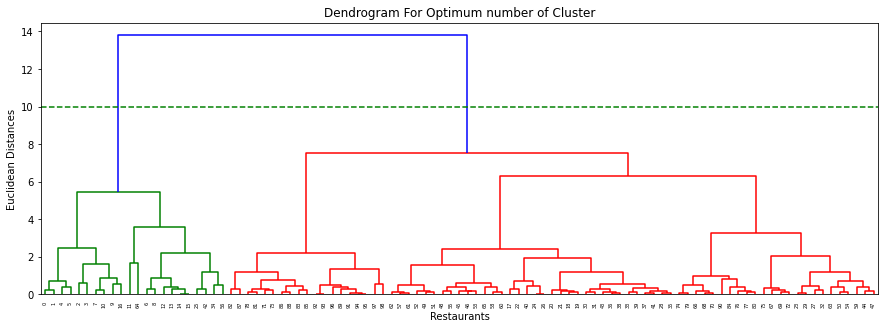

In [159]:
# Dendogram to find out the optimal number of clusters for the hierarchical clustering algorithm
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(clust_df, method = 'ward'))
plt.axhline(y=10, color="green", linestyle="--",label= 'Number of Cluster = 2')
# Lets Plot dendrogram
plt.title('Dendrogram For Optimum number of Cluster')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.show()

* From the above dendogram, we can see that cluster count of 2 is optimum. 

* Let us implement the agglomerative clustering algoritm with n_clusters = 2 and look at the visualizations to see if we get better results compared to K-means clustering.

In [160]:
# n_clusters = 2
model_hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
ypredicted_hc = model_hc.fit_predict(clust_df)
# adding the cluseter indices to the merged dataframe
merged_df['cb_cluster_hc2'] = ypredicted_hc


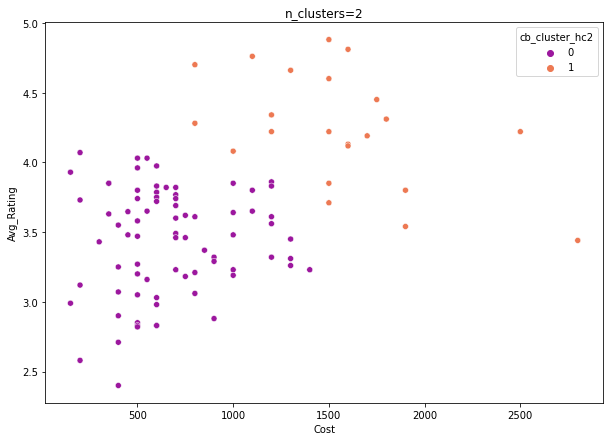

In [161]:
# Plot constraints
plt.figure(figsize=(10,7))
p=sns.scatterplot( x=merged_df['Cost'], y=merged_df['Avg_Rating'],hue=merged_df['cb_cluster_hc2'],palette='plasma')
p.set_title('n_clusters=2')
plt.show()

In [162]:
# Reading the merged_df dataframe from the previous iteration(to maintain consistency of cluster labels in every run of this file)
merged_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS: Vilas Sonawane/merged_df.csv')

Looking at the visualizations above, we can see that the clusters provided by the k-means algorithm is clearly separating the cluster than those from the hierarchical clustering. So we will select the cluster results we obtained from the k-means clustering algorithm with K=5 only. 
* Let us look at the cluster profiles of the clusters we obtained once again.

In [163]:
cluster_profile_cb_df[['cb_cluster_5','No of restaurants','Median Cost','Min Cost','Max Cost','Avg Rating']]

,cb_cluster_5,No of restaurants,Median Cost,Min Cost,Max Cost,Avg Rating
0,0,35,550.0,150,800,3.738376
1,1,21,1200.0,850,1500,3.514762
2,2,15,1500.0,800,1800,4.431176
3,3,24,500.0,150,900,2.976355
4,4,4,2200.0,1900,2800,3.750000


* We saw earlier that high cost restaurants have better ratings on average. So cluster 1(which is high cost) having a mean rating of 3.5 can be considered as having a poor rating.
* Similarly, Cluster 0(Low cost) can be considered to be having a good rating for low cost restaruants
* So we have 5 clusters in total. We can describe the clusters in the following way:
  1. Cluster: 0 ---> Low Cost and Good Rating
  2. Cluster: 1 ---> High Cost and Poor Rating
  3. Cluster: 2 ---> High Cost and Good Rating
  4. Cluster: 3 ---> Low Cost and Poor Rating
  5. Cluster: 4 ---> Super Costly

Let us assign the cluster names we defined above to the cluster profile dataframe.

In [164]:
clust_cb_names = {
    0:'Low Cost and Good Rating',
    1:'High Cost and Poor Rating',
    2:'High Cost and Good Rating',
    3:'Low Cost and Poor Rating',
    4:'Super Costly'
}

In [165]:
cluster_profile_cb_df['CB Cluster Name'] = cluster_profile_cb_df['cb_cluster_5'].apply(lambda x: clust_cb_names[x])
cluster_profile_cb_df.drop('cb_cluster_5',axis =1, inplace = True)

In [166]:
cluster_profile_cb_df

,No of restaurants,Median Cost,Min Cost,Max Cost,Avg Rating,Mean Sentiment Polarity,Percentage of positive reviews,CB Cluster Name
0,35,550.0,150,800,3.738376,0.286024,77.9,Low Cost and Good Rating
1,21,1200.0,850,1500,3.514762,0.244854,79.5,High Cost and Poor Rating
2,15,1500.0,800,1800,4.431176,0.430084,94.9,High Cost and Good Rating
3,24,500.0,150,900,2.976355,0.136572,58.9,Low Cost and Poor Rating
4,4,2200.0,1900,2800,3.750000,0.294734,86.2,Super Costly


* So restaurants in 'Low Cost and Good Rating' cluster gives the highest cost to benefit for a customer looking for affordability.
* Among the High cost restaurants, restaurants in 'High Cost and Good Rating' cluster will be recommended.
* For customers looking for very luxurious and super costly restaurants, we can recommend restaurants from the 'Super Costly' cluster.
* Let us do further analysis into the problematic segments where the cost to benefit is the lowest for restaurants. - 'High Cost and Poor Rating' and 'Low Cost and Poor Rating' clusters

To begin with, let us put the clustered restaurants on the map.

In [167]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[merged_df.iloc[3]['latitude'],merged_df.iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

# Adding the markers of restaurant locations
for i in merged_df.index:
  if merged_df.loc[i,'cb_cluster_5'] == 0:
    icon_name = folium.Icon(color='purple',icon='none') 
  elif merged_df.loc[i,'cb_cluster_5'] == 1:
    icon_name = folium.Icon(color='red',icon='none')
  elif merged_df.loc[i,'cb_cluster_5'] == 2:
    icon_name = folium.Icon(color='blue',icon='none')
  elif merged_df.loc[i,'cb_cluster_5'] == 3:
    icon_name = folium.Icon(color='orange',icon='none')
  else:
    icon_name = folium.Icon(color='green',icon='none')
  folium.Marker(location=[merged_df.latitude[i], merged_df.longitude[i]],icon=icon_name).add_to(mapit)

mapit

* The clusters of interest - High cost and poor rating and low cost and poor rating are coloured in red and orange in the above map respectively.
* Clearly these restaurants are not concentrated in any location but are distributed all over Gachibowli.
* Let us take each of these clusters and analyse what the customers are complaining about and how the restaurants in the respective clusters have performed over time.

# **7. Cost Benifit Analysis of Cluster**

###**1. Analysis of restaurants in 'High cost and poor rating' cluster:**

In [168]:
# Adding the cluster column to the review_df dataframe
review_df = pd.merge(left = review_df, right = merged_df[['Restaurant','cb_cluster_5']],on = 'Restaurant',how='left')
clust0_df = review_df[review_df['cb_cluster_5']==1]

In [169]:
clust0_df['Restaurant'].nunique()

21

* We have 21 restaurants belonging to this category.

In [170]:
clust0_df.shape

(2100, 19)

So we have 2100 reviews for restaurants belonging to cluster 0. Let us see how many of them are negative reviews.

In [171]:
clust0_df[clust0_df['Sentiment']=='negative'].shape

(391, 19)

391 out of 2100 reviews have negative sentiment. Now let us look at the word cloud of these negative reviews.

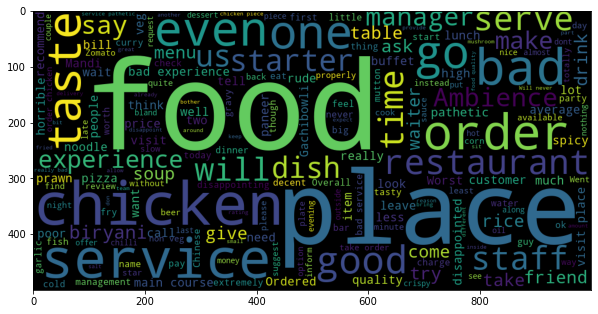

In [172]:
plot_df = clust0_df[clust0_df['Sentiment']=='negative']
word_cloud = ""
for row in plot_df.clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)

Predominant words used by the users are (Chicken, food, taste), (service, time, ambience, staff, manager, serve, management, experience).
So the users are very unhappy with respect to:
* Taste of Chicken items.
* Words like service, time, ambience, staff, manager, serve, management, experience indicate that many customers are unhappy with the dining experience at the restaurants. This is the predominant theme in the customers' negative reviews. So most of the customers in this category of restaurants which is high cost, are talking about their bad experience in dining at the restaurant.

Now, let us look at the performance of the 10 restaurants with the least average rating over time.

In [173]:
# Extracting the 10 poorest performing restaurants in cluster 0
poor_rest_list = list(clust0_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values('Rating').head(10)['Restaurant'])

Text(0, 0.5, 'Average rating')

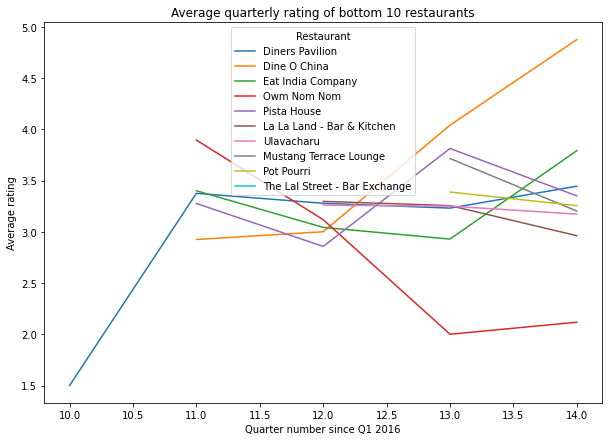

In [174]:
# Finding the quarterwise average rating and sentiment polarity of each restaurant
quarter_wise = clust0_df.groupby(by=['Quarter','Restaurant'])['Rating','Sentiment_Polarity'].agg({'Rating':mean,'Sentiment_Polarity':mean}).reset_index()
quarter_wise = quarter_wise[quarter_wise['Restaurant'].apply(lambda x: x in poor_rest_list)]
# Selecting only the latest 2 years of data to maintain consistency in the plot
quarter_wise = quarter_wise[quarter_wise['Quarter']>=8]
# Average quarterly rating of Restaurants in cluster 0
plt.figure(figsize=(10,7))
sns.lineplot(y='Rating', x="Quarter",data=quarter_wise,hue='Restaurant')
plt.title('Average quarterly rating of bottom 10 restaurants')
plt.xlabel('Quarter number since Q1 2016')
plt.ylabel('Average rating')

Except for Dine O China, all other restaurants have continued with their average performance for the last 3 quarters. Though there is no drop in rating over time, this proves that the restaurants did not act on the negative reviews to improve over time. Only, Dine O China has acted positively to improve its rating from 3 to 5 over the latest 3 quarters.

###**2. Analysis of restaurants in 'Low cost and poor rating' cluster:**

In [175]:
# selecting the cluster 3 rows only
clust3_df = review_df[review_df['cb_cluster_5']==3]

In [176]:
clust3_df['Restaurant'].nunique()

24

We have 24 restaurants belonging to this cluster

In [177]:
clust3_df.shape

(2398, 19)

So we have 2398 reviews belonging to the restaurants in this cluster. Let us see how many of them are negative.

In [178]:
clust3_df[clust3_df['Sentiment']=='negative'].shape

(754, 19)

754 out of 2398 reviews represent negative sentiment. This fraction is larger for cluster 3 compared to cluster 0. Let us look at the word cloud of negative reviews.

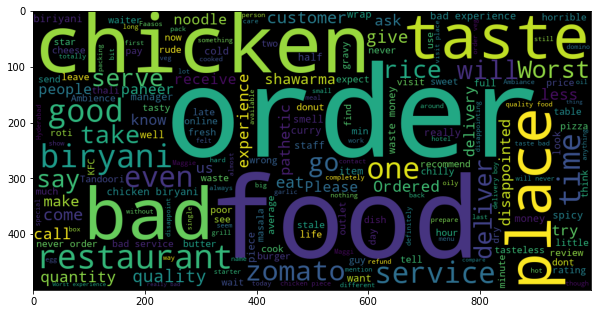

In [179]:
plot_df = clust3_df[clust3_df['Sentiment']=='negative']
word_cloud = ""
for row in plot_df.clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)

Predominant words used by the users are (Chicken, biryani, food, rice, taste, quality), (zomato, order, deliver, call, service)

So the users are very unhappy with respect to:
* Chicken items and Biryani. The taste and quality of these items need immediate attention.
* Users highlighted the issues related to delivery and delivery time by zomato. This may indicate a potential logistical issue from Zomato in delivery of orders from these restaurants.

Unlike for cluster 3, the predominant theme in this cluster is about delivery of food. This indicates that customers consume food from these restaurants more through online delivery than for in-person dining at the restaurants.

Now, let us look at the performance of the 10 restaurants with the least average rating over time.

In [180]:
# Extracting the 10 poorest performing restaurants in cluster 0
poor_rest_list = list(clust3_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values('Rating').head(10)['Restaurant'])

Text(0, 0.5, 'Average rating')

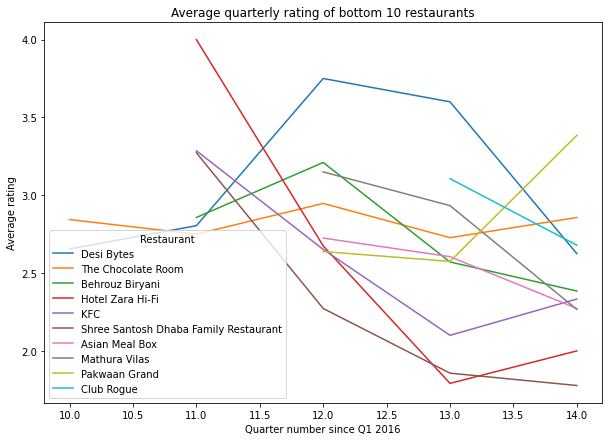

In [181]:
# Finding the quarterwise average rating and sentiment polarity of each restaurant
quarter_wise = clust3_df.groupby(by=['Quarter','Restaurant'])['Rating','Sentiment_Polarity'].agg({'Rating':mean,'Sentiment_Polarity':mean}).reset_index()
quarter_wise = quarter_wise[quarter_wise['Restaurant'].apply(lambda x: x in poor_rest_list)]
# Selecting only the latest 2 years of data to maintain consistency in the plot
quarter_wise = quarter_wise[quarter_wise['Quarter']>=8]
# Average quarterly rating of Restaurants in cluster 0
plt.figure(figsize=(10,7))
sns.lineplot(y='Rating', x="Quarter",data=quarter_wise,hue='Restaurant')
plt.title('Average quarterly rating of bottom 10 restaurants')
plt.xlabel('Quarter number since Q1 2016')
plt.ylabel('Average rating')

Except for Pakwaan Grand, which made an improvement from 2.5 to 3.5, all the restaurants have either continued with their poor performance or have become even worse in terms of user rating. Especially, Shree Santosh Dhaba, Hotel Zara Hi-Fi, Mathura Vilas, Aromas@11SIX and KFC had a steep decline in their ratings.

# **8. Recommendation of restaurants for customers**

* To recommend the best restaurants for the customers, we will utilize the geographical clustering and cost benefit clustering we performed in the previous section.

Let us look at each of the geographical clusters we obtained again.  
  * Old Bombay Rd(between ORR junction and ISB Junction)
  * Near Wipro and ISB
  * Old Bombay Rd(between Khajaguda Jn and ORR Jn)

Let us look at the cluster profile of the restaurants with respect to average cost and rating again.

In [182]:
cluster_profile_cb_df

,No of restaurants,Median Cost,Min Cost,Max Cost,Avg Rating,Mean Sentiment Polarity,Percentage of positive reviews,CB Cluster Name
0,35,550.0,150,800,3.738376,0.286024,77.9,Low Cost and Good Rating
1,21,1200.0,850,1500,3.514762,0.244854,79.5,High Cost and Poor Rating
2,15,1500.0,800,1800,4.431176,0.430084,94.9,High Cost and Good Rating
3,24,500.0,150,900,2.976355,0.136572,58.9,Low Cost and Poor Rating
4,4,2200.0,1900,2800,3.750000,0.294734,86.2,Super Costly


* From the clustering analysis we can conclude that the high cost category includes all the restaurants that cost more than 850 Rs. per person and low cost ones cost less than 850 Rs. per person.
* The supercostly restaurants are those restaurants that are costlier than 1900 Rs. per person.

Now, let us look at the number of restaurants in each cost benefit cluster according to each geographical cluster.

In [183]:
# Let us add the cluster names to the merged_df dataframe
merged_df['CB Cluster Name'] = merged_df['cb_cluster_5'].apply(lambda x: clust_cb_names[x])
merged_df.drop(['cb_cluster_5','cb_cluster_4','cb_cluster_hc4','cb_cluster_hc5'],axis = 1,inplace = True)

In [184]:
merged_df.head()

,Unnamed: 0,Unnamed: 0.1,Restaurant,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Avg_Rating,Name,Cost,latitude,longitude,...,Fast Food,Desserts/ Juices / Bakery,South Indian,Seafood,Arabian,no_of_reviews,no_of_positive_reviews,percent_of_positve_reviews,Geo Cluster Name,CB Cluster Name
0,0,0,AB's - Absolute Barbecues,0.587395,0.715231,4.88,AB's - Absolute Barbecues,1500,17.443108,78.357247,...,0,0,0,0,1,100,100,1.00,Old Bombay Rd(between ORR junction and ISB Jun...,High Cost and Good Rating
1,1,1,B-Dubs,0.497512,0.644784,4.81,B-Dubs,1600,17.434877,78.368815,...,0,0,0,0,0,100,99,0.99,Old Bombay Rd(between Khajaguda Jn and ORR Jn),High Cost and Good Rating
2,2,2,"3B's - Buddies, Bar & Barbecue",0.518821,0.684991,4.76,"3B's - Buddies, Bar & Barbecue",1100,17.442712,78.357257,...,0,0,0,0,1,100,96,0.96,Old Bombay Rd(between ORR junction and ISB Jun...,High Cost and Good Rating
3,3,3,Paradise,0.476557,0.663962,4.70,Paradise,800,17.442382,78.356580,...,0,0,0,0,0,100,96,0.96,Old Bombay Rd(between ORR junction and ISB Jun...,High Cost and Good Rating
4,4,4,Flechazo,0.526417,0.661154,4.66,Flechazo,1300,17.435255,78.368087,...,0,1,0,0,1,100,99,0.99,Old Bombay Rd(between Khajaguda Jn and ORR Jn),High Cost and Good Rating


In [185]:
# number of restaurants in each geographical cluster according to each cost benefit cluster
plot_df = merged_df.groupby(['Geo Cluster Name','CB Cluster Name'])['Restaurant'].count().reset_index()

In [186]:
plot_df

,Geo Cluster Name,CB Cluster Name,Restaurant
0,Near Wipro and ISB,High Cost and Good Rating,4
1,Near Wipro and ISB,High Cost and Poor Rating,2
2,Near Wipro and ISB,Low Cost and Good Rating,3
3,Near Wipro and ISB,Low Cost and Poor Rating,2
4,Near Wipro and ISB,Super Costly,3
5,Old Bombay Rd(between Khajaguda Jn and ORR Jn),High Cost and Good Rating,3
6,Old Bombay Rd(between Khajaguda Jn and ORR Jn),High Cost and Poor Rating,8
7,Old Bombay Rd(between Khajaguda Jn and ORR Jn),Low Cost and Good Rating,6
8,Old Bombay Rd(between Khajaguda Jn and ORR Jn),Low Cost and Poor Rating,4
9,Old Bombay Rd(between ORR junction and ISB Jun...,High Cost and Good Rating,8


### **1. Number of restaurants in each geographical cluster according to each cost benefit cluster**

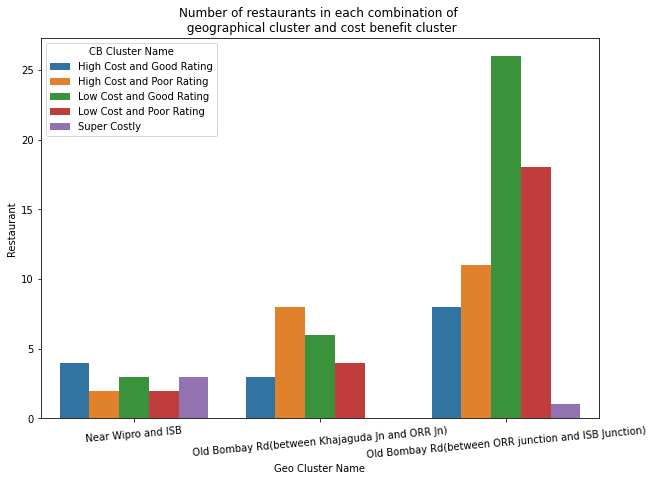

In [187]:
plt.figure(figsize=(10,7))
plot=sns.barplot(x=plot_df['Geo Cluster Name'],y=plot_df['Restaurant'],hue =plot_df['CB Cluster Name'] )
plt.setp(plot.get_xticklabels(), rotation=5)
plt.title('Number of restaurants in each combination of \n geographical cluster and cost benefit cluster')
plt.show()

* As expected, most of the restaurants are located in the ORR junction and ISB junction area. This area contains the most affordable restaurants.
* Except one, all the super costly restaurants are located near Wipro and ISB.
* High cost restaurants with good rating are available in all the areas of Gachibowli.

In [188]:
merged_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Restaurant', 'Mean_Sentiment_Polarity',
       'Mean_Sentiment_Subjectivity', 'Avg_Rating', 'Name', 'Cost', 'latitude',
       'longitude', 'Has_Featured', 'Outdoor seating', 'Entertainment', 'Wifi',
       'Breakfast', 'Parking available', 'Seating available',
       'Alcohol avialable', 'Family Friendly', 'Home Delivery', 'Brunch',
       'Romantic Dining', 'no of services', 'North Indian', 'Chinese',
       'Continental/ Mexican', 'Biryani/Mughlai', 'Asian', 'Fast Food',
       'Desserts/ Juices / Bakery', 'South Indian', 'Seafood', 'Arabian',
       'no_of_reviews', 'no_of_positive_reviews', 'percent_of_positve_reviews',
       'Geo Cluster Name', 'CB Cluster Name'],
      dtype='object')

## **Summary of clustering analysis**
We performed the clustering of restaurants based on two parameters:
* Location based clustering(using latitude and longitude)
* Clustering based on average rating and cost to perform a cost benefit analysis and to identify the cost categories.


**Location based clustering:**
* We identified three major clusters listed below.
  * Old Bombay Rd(between Khajaguda Jn and ORR Jn
  * Old Bombay Rd(between ORR junction and ISB Junction
  * Near Wipro and ISB
* From the cluster profiling, we obtained the following insights:
  * Restaurants near Wipro and ISB are relatively costlier than others in Gachibowli.
  * The average ratings of all the clusters is almost identical. But, looking at the average cost of each cluster, the restaurants in the Old Bombay Rd(between ORR junction and ISB Junction) offer the highest benefit for the cost on average.
  * Most of the restaurants are located in the Old Bombay Rd(between ORR junction and ISB Junction). So users can find a lot of options within this small stretch.

**Clustering based on average rating and cost:**
* We divided the restaurants into 5 major clusters based on their average ratings and cost per person listed below.
  * Low Cost and Good Rating
  * High Cost and Poor Rating
  * High Cost and Good Rating
  * Low Cost and Poor Rating
  * Super Costly

* Using the cluster profiles of these clusters, we identified three major clusters based only on cost to decide the cost categories.
  * Low cost: Restaurants costing less than 850 Rs. per person
  * High cost: Restaurants costing more than 850 Rs. and less than 1900 Rs. per person
  * Very Luxurious: Restaurants costing more than 1900 Rs. per person

* Then we analysed the problematic restaurant clusters which had poor rating overall.
  * We found that the restaurants in 'low cost and poor rating' cluster and 'high cost and poor rating' cluster are distributed all over Gachibowli and were not concentrated in any specific location.
  * For the restaurants in 'high cost and poor rating' cluster:
    * We identified the following predominant concerns raised by the users:
      * Taste of Chicken items was a major issue.
      * Customers were unhappy with the dining experience at the restaurants. This was the predominant theme in the customers' negative reviews. So most of the customers in this category of restaurants which is high cost, are talking about their bad experience in dining at the restaurant.
    * We looked at how the restaurants in this cluster have performed over several quarters and found that except for Dine O China, all other restaurants have continued with their average performance for the last 3 quarters. This may indicate that the restaurants did not act on the negative reviews to improve over time. Only, Dine O China has acted positively to improve its rating from 3 to 5 over the latest 3 quarters.

  * For the restaurants in 'low cost and poor rating' cluster, we identified the following predominant concerns raised by the users:
    * The taste and quality of Chicken items and Biryani need immediate attention.
    * Users highlighted the issues related to delivery and delivery time by zomato. This may indicate a potential logistical issue from Zomato in delivery of orders from these restaurants. Unlike the 'high cost and poor rating' cluster, the predominant theme in this cluster is about delivery of food. This indicates that customers consume food from these restaurants more through online delivery than for in-person dining at the restaurants.
  * We looked at how the restaurants in this cluster have performed over several quarters and found that except for Pakwaan Grand, which made a mild improvement from 2.5 to 3.5, all the restaurants have either continued with their poor performance or have become even worse in terms of user rating. Especially, Shree Santosh Dhaba, Hotel Zara Hi-Fi, Mathura Vilas, Aromas@11SIX and KFC had a steep decline in their ratings over the last 3 quarters.

###**2. Interactive Restaurant Recommendation System:**

Now, we will build an interactive system for the users to choose their choices of area of the restaurant, Cost category, cuisines, additional services etc. This system will capture the user inputs and display the top three restaurants according to the choices selected by user.

In [189]:
def recommendation(merged_df, area = '', cost_category = '', cuisines=[], services=[], should_be_featured=0):
  '''
  This function takes the following inputs:
  1) area of the restaurants
  2) Cost category:
  3) merged_df dataframe containing the cluster labels, restaurant names and average ratings of the restaurants
  4) List of Cuisines
  5) List of additional services required
  6) should_be_featured - A binary variable to indicate if the customer wants to look at only those
      restaurants which have featured in the list of Hyderabad's best restaurants
  It will return the top 3 restaurants as per the user choices
  '''

  if cost_category == 'High Cost':
    l = 850
    h = 1900
  elif cost_category == 'Very Luxurious':
    l = 1900
    h = merged_df['Cost'].max()+1
  else:
    l = 0
    h = 850
  
  # Handling the cost_category input
  tmp_df = merged_df.copy()
  if cost_category=='':
    pass
  else:
    tmp_df = tmp_df[(tmp_df['Cost']>=l) & (tmp_df['Cost']<h)]
  
  # Handling the area input
  if area == '':
    pass
  else:
    tmp_df = tmp_df[tmp_df['Geo Cluster Name']==area]
  
  # Handling the cuisine input
  for cus in cuisines:
    tmp_df = tmp_df[tmp_df[cus]==1]
  
  # Handling the services input
  for serv in services:
    tmp_df = tmp_df[tmp_df[serv]==1]

  # Handling the should_be_featured input
  if should_be_featured == 1:
    tmp_df = tmp_df[tmp_df['Has_Featured']==1]

  tmp_df = tmp_df.sort_values('Avg_Rating', ascending = False).head(3)

  return list(tmp_df['Restaurant'])

Let us now use this function to print the top restaurants in each area of Gachibowli according to the cost category.

In [190]:
# Let us list the top restaurants in each area in each cost category
for area in geo_clust_names.values():
  for cat in ['High Cost','Low Cost','Very Luxurious']:
    tmp = recommendation(area=area ,cost_category = cat, merged_df = merged_df)
    
    if len(tmp) == 0:
      print(f"There are no restaurants in {area} area in the {cat} category.")
    elif len(tmp)<=2:
      print(f"There are only {len(tmp)} restaurants in {area} area in the {cat} category. These are the names of those restaurants:")
    else:
      print(f"These are the top 3 restaurants in {area} area in the {cat} category:")
    for i, rest in enumerate(tmp):
      print(f"{i+1}) {rest}")
    print()

These are the top 3 restaurants in Old Bombay Rd(between Khajaguda Jn and ORR Jn) area in the High Cost category:
1) B-Dubs
2) Flechazo
3) Labonel

These are the top 3 restaurants in Old Bombay Rd(between Khajaguda Jn and ORR Jn) area in the Low Cost category:
1) Beyond Flavours
2) Biryanis And More
3) Cafe Eclat

There are no restaurants in Old Bombay Rd(between Khajaguda Jn and ORR Jn) area in the Very Luxurious category.

These are the top 3 restaurants in Old Bombay Rd(between ORR junction and ISB Junction) area in the High Cost category:
1) AB's - Absolute Barbecues
2) 3B's - Buddies, Bar & Barbecue
3) The Indi Grill

These are the top 3 restaurants in Old Bombay Rd(between ORR junction and ISB Junction) area in the Low Cost category:
1) Paradise
2) KS Bakers
3) NorFest - The Dhaba

There are only 1 restaurants in Old Bombay Rd(between ORR junction and ISB Junction) area in the Very Luxurious category. These are the names of those restaurants:
1) 10 Downing Street

These are the t

Let us now write a function that will interact with the user to ask for their inputs and display the top restaurants as per the user choice.

In [191]:
def user_choices():
  '''
  This function is a system for users to select their choices with respect to the area, cost category,
  cuisines, additional services, should the restaurant be a featured restaurant. Based on the user choices,
  the function will print the top restaurants in those categories
  '''
  
  print('Please select the choices as requested. If you do not want to select a filter, just hit enter. Thank you.')
  print('\n \n')

  # Geographical area of the restaurant
  print('Please enter the area of the restaurant from among the following options:')
  for i,a in enumerate(sorted(list(geo_clust_names.values()))):
    print(f"{i}) {a}")
  tmp = input()
  if tmp == '':
    area = ''
  else:
    area = sorted(list(geo_clust_names.values()))[int(tmp)]
  print('\n')
  print(f"You have selected {area}")
  print('\n \n')

  # Cost Category of the restaurant
  print('Please select what cost category you are looking for from among the following options:')
  for i,cat in enumerate(['High Cost','Low Cost','Very Luxurious']):
    print(f"{i}) {cat}")
  tmp = input()
  if tmp == '':
    cost = ''
  else:
    cost = ['High Cost','Low Cost','Very Luxurious'][int(tmp)]
  print('\n')
  print(f"You have selected {cost} category.")
  print('\n \n')


  # Cuisines
  print('Please select which cuisines you want. If you want to explore multiple cuisines of a \n single restaurant, enter all the options separated by ","')
  cus_list = ['North Indian', 'Chinese',
       'Continental/ Mexican', 'Biryani/Mughlai', 'Asian', 'Fast Food',
       'Desserts/ Juices / Bakery', 'South Indian', 'Seafood', 'Arabian']
  for i,cus in enumerate(cus_list):
    print(f"{i}) {cus}")
  inp = input()
  if inp == '':
    cus_out = []
  else:
    inp = inp.split(',')
    cus_out = []
    for i in inp:
      cus_out.append(cus_list[int(i)])

  print('\n')
  print(f"You have selected these cuisines: {cus_out}")
  print('\n \n')


  # Additional Services
  print('Please select the additional services you want from the following. \n If you want to explore multiple cuisines of a single restaurant,\n enter all the options separated by ","')
  adds = ['Outdoor seating', 'Entertainment', 'Wifi',
       'Breakfast', 'Parking available', 'Seating available',
       'Alcohol avialable', 'Family Friendly', 'Home Delivery', 'Brunch',
       'Romantic Dining']
  for i,ser in enumerate(adds):
    print(f"{i}) {ser}")
  inp = input()
  if inp == '':
    add_out = []
  else:
    inp = inp.split(',')
    add_out = []
    for i in inp:
      add_out.append(adds[int(i)])
  print('\n')
  print(f"You have selected these services:{add_out}")
  print('\n \n')


  # Should be featured
  featured = input("Please enter 1 if you want the restaurant to be featured in Hyderabad's best list")
  if (featured == '')|(featured == 0):
    featured = 0
  else:
    featured = 1
  print('\n')
  print(f"You have selected {featured}")
  print('\n \n')
  print('----------------------------------------------------------------------')
  tmp = recommendation(merged_df, area = area, cost_category = cost,
                         cuisines = cus_out, services = add_out, should_be_featured = featured)
  if len(tmp) == 0:
    print(f"There are no restaurants in Gachibowli for the given selection. Please try again after dropping some of the choices.")
  elif len(tmp)<=3:
    print(f"There are only {len(tmp)} restaurants in Gachibowli for the given selection. These are the names of those restaurants:")
  else:
    print(f"These are the top 3 restaurants in Gachibowli for the given user selection:")
  for i, rest in enumerate(tmp):
    print(f"{i+1}) {rest}")
  print('----------------------------------------------------------------------')
  print('Thank you!')
  

### **3. Demonstration of the interactive user recommendation system:**

Let us ask the system to provide the top restaurants in Old Bombay Rd(between ORR junction and ISB Junction) area in low cost category, which provide home delivery services.

In [192]:
user_choices()

Please select the choices as requested. If you do not want to select a filter, just hit enter. Thank you.

 

Please enter the area of the restaurant from among the following options:
0) Near Wipro and ISB
1) Old Bombay Rd(between Khajaguda Jn and ORR Jn)
2) Old Bombay Rd(between ORR junction and ISB Junction)
0


You have selected Near Wipro and ISB

 

Please select what cost category you are looking for from among the following options:
0) High Cost
1) Low Cost
2) Very Luxurious
1


You have selected Low Cost category.

 

Please select which cuisines you want. If you want to explore multiple cuisines of a 
 single restaurant, enter all the options separated by ","
0) North Indian
1) Chinese
2) Continental/ Mexican
3) Biryani/Mughlai
4) Asian
5) Fast Food
6) Desserts/ Juices / Bakery
7) South Indian
8) Seafood
9) Arabian
0,1


You have selected these cuisines: ['North Indian', 'Chinese']

 

Please select the additional services you want from the following. 
 If you want to explore 

Let us explore the top restaurants that featured in Hyderabad's best list.

In [193]:
user_choices()

Please select the choices as requested. If you do not want to select a filter, just hit enter. Thank you.

 

Please enter the area of the restaurant from among the following options:
0) Near Wipro and ISB
1) Old Bombay Rd(between Khajaguda Jn and ORR Jn)
2) Old Bombay Rd(between ORR junction and ISB Junction)
1


You have selected Old Bombay Rd(between Khajaguda Jn and ORR Jn)

 

Please select what cost category you are looking for from among the following options:
0) High Cost
1) Low Cost
2) Very Luxurious
1


You have selected Low Cost category.

 

Please select which cuisines you want. If you want to explore multiple cuisines of a 
 single restaurant, enter all the options separated by ","
0) North Indian
1) Chinese
2) Continental/ Mexican
3) Biryani/Mughlai
4) Asian
5) Fast Food
6) Desserts/ Juices / Bakery
7) South Indian
8) Seafood
9) Arabian
3


You have selected these cuisines: ['Biryani/Mughlai']

 

Please select the additional services you want from the following. 
 If yo

## **Summary of recommendation of restaurants to the customers**
To recommend the best restaurants for the customers, we utilized the geographical clustering and cost benefit clustering we performed in the previous section. We built an interactive filtering system, which displays the top restaurants based on average user rating for the choices selected by the customer. The system allows the user to choose the following filters to get the best restaurants according to his/her needs:
* Area - 3 choices
  * Old Bombay Rd(between ORR junction and ISB Junction)
  * Near Wipro and ISB
  * Old Bombay Rd(between Khajaguda Jn and ORR Jn)
* Cost Category - 3 choices
  * High cost
  * Low cost
  * Very luxurious
* Cuisines from the list of available cuisines
* Services from the list of major services available
* Should have featured - to select only those restaurants that have featured in Hyderabad's most popular places list

We demonstrated the interactive recommendations for three user inputs and also displayed the top three restaurants in each area of Gachibowli for each cost category.

# **9. Conclusion**

So on the basis of our overall analysis in this project follwing are our conclusion
1.	North Indian is the predominant cuisine in Gachibowli Hyderabad. It is offered in 60% of the restaurants in the area. It is followed by Chinese and Continental/Mexican cuisine
2.	Majority of the restaurants seem to be located on the old-Bombay highway of Hyderabad.
3.	Gachibowli seems to be have a lot of very famous restaurants since 26% of the restaurants in this small area alone have featured in the list of Hyderabad's best restaurants.
4.	It is interesting to note that 70% of the restaurants have home delivery services as well as indoor dining facilities available.
5.	Parking space is available only in 30% of the restaurants so this is an area for improvement in future.
6.	So based on sentiment analysis of the review given by customer overall 76 % reviewer have given positive reviews,18 % Reviewer have given Negative reviews & 4.99 % reviewer have given Neutral reviews

7.	Overall which restaurants have received negative reviews staff, service, guy, and waiter this words appear majorly in negative reviews which indicates that the customers are giving bad reviews due to poor service which is area of concern.
8.	From the word cloud we can suggest that taste of the food at restaurants, staff services at dining restaurants & quality and taste of the chicken items need to improve because this things are frequently mentioned by no of customer in there negative reviews.
9.	AB's-Absolute Barbecues received the highest rating in Gachibowli which signifies the popularity of the restaurants & restaurant Zara Hi-Fi received the least average rating which shows it is the least popular restaurant in Hyderabad.
10.	According to location of restaurants we have obtained three geographical clusters first at Old Bombay road (between Khajaguda Jn and ORR Jn), second at Old Bombay road (between ORR junction and ISB Junction) & third Near Wipro and ISB. 
11.	We can infer the following insights from the above cluster profiling Restaurants near Wipro and ISB are relatively costlier than others in Gachibowli.
12.	Most of the affordable restaurants are located in the ORR junction and ISB junction area and except one, all the super costly restaurants are located near Wipro and ISB. High cost restaurants with good rating are available in all the areas of Gachibowli.

13.	The average ratings of all the clusters is almost identical. But, looking at the average cost of each cluster, the restaurants in the Old Bombay Rd (between ORR junction and ISB Junction) offer the highest cost benefit for the customer on average.
14.	Most of the restaurants are located in the Old Bombay road (between ORR junction and ISB Junction). So customers can find a lot of options within this small stretch.
15.	So restaurants in 'Low Cost and Good Rating' cluster gives the highest cost to benefit for a customer looking for affordability.
16.	Among the High cost restaurants, restaurants in 'High Cost and Good Rating' cluster will be recommended. For customers looking for very luxurious and super costly restaurants, we can recommend restaurants from the 'Super Costly' cluster.
17.	 In high cost poor rating restaurants predominant words used by the customers are (Chicken, food, taste), (service, time, ambience, staff, manager, serve, management, experience). So it shows the customers are very unhappy with respect to taste of chicken items.
18.	In high cost poor rating restaurants words like service, time, ambience, staff, manager, serve, management, experience indicate that many customers are unhappy with the dining experience at this restaurants. This is the predominant theme in the customers' negative reviews. So most of the customers in this category of restaurants which is high cost, are talking about their bad experience in dining at the restaurant.
19.	In performance of the bottom 10 restaurants with the low cost least average rating over time Except for Dine O China, all other restaurants have continued with their average performance for the last 3 quarters. Though there is no drop in rating over time, this proves that the restaurants did not act on the negative reviews to improve over time. Only, Dine O China has acted positively to improve its rating from 3 to 5 over the latest 3 quarters.
20.	In low cost and poor rating cluster bottom 10 restaurants customers are very unhappy with respect to Chicken items and Biryani. The taste and quality of these items need immediate attention in this restaurants.
21.	In low cost and poor rating cluster some customers also highlighted the issues related to delivery and delivery time by Zomato. This may indicate a potential logistical issue from Zomato in delivery of orders from these restaurants.
22.	Unlike for cluster 3, the predominant theme in this cluster is about delivery of food. This indicates that customers consume food from these restaurants more through online delivery than for in-person dining at the restaurants.
23.	The performance of the bottom 10 restaurants with the least average rating over time. Except for Pakwaan Grand, which made an improvement from 2.5 to 3.5, all the restaurants have either continued with their poor performance or have become even worse in terms of user rating. Especially, Shree Santosh Dhaba, Hotel Zara Hi-Fi, Mathura Vilas, Aromas@11SIX and KFC had a steep decline in their ratings.
